# 🌦🌡 Weather Forecasting 📈 



###### About the Dataset
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. 

### Perform exploratory data analysis (EDA) and time series forecasting on  weather dataset

## Load the Dataset

#### Import Libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA


#### Load and Explore the Dataset

In [53]:
df=pd.read_csv(r"temp.csv")


In [54]:
#Setting option to see all the columns.
pd.set_option('display.max_columns', None)

## Basic Overview

In [55]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [56]:
df.shape

(7752, 25)


Features
- station - used weather station number: 1 to 25
- Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
- Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
- Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
- LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
- LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
- LDAPSTmaxlapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
- LDAPSTminlapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
- LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
- LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
- LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
- LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
- LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
- LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
- LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
- LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
- LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
- LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
- lat - Latitude (Â°): 37.456 to 37.645
- lon - Longitude (Â°): 126.826 to 127.135
- DEM - Elevation (m): 12.4 to 212.3
- Slope - Slope (Â°): 0.1 to 5.2
- Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
- Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
- Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T  



In [57]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Here's what we can conclude from the summary statistics:

**1.Count:** 
We have a total of 7750 data points for most columns, except for Next_Tmax and Next_Tmin, which have 7725 non-null values. This indicates there are some missing values in these two target variables.

**2.Mean(AVG):**

*Present_Tmax* has an average daily maximum temperature of approximately 29.77°C.

*Present_Tmin* has an average daily minimum temperature of approximately 23.23°C.

*lat and lon* represent the latitude and longitude, respectively.

*DEM (Digital Elevation Model)* has an average value of approximately 126.99.

*Slope* has an average slope value of approximately 61.87.

*Solar radiation* has an average solar radiation value of approximately 1.26.

*Next_Tmax* has an average of approximately 30.27°C.

*Next_Tmin* has an average of approximately 22.93°C.


**3.Standard Deviation (Std):**

The standard deviation provides a measure of the spread or variability in the data.
For example, *Present_Tmax* has a relatively low standard deviation of approximately 2.97, indicating that the daily maximum temperature doesn't vary significantly from day to day.



**4.Min and Max:**

These values represent the minimum and maximum values in each column.
For instance, the minimum value for Present_Tmax is 20°C, while the maximum is 37.6°C.
Similarly, Next_Tmax ranges from 17.4°C to 38.9°C, and Next_Tmin ranges from 11.3°C to 29.8°C.


**Percentiles (25%, 50%, 75%):**

These values provide insight into the data distribution.
For example, the 25th percentile (Q1) for Present_Tmax is 27.8°C, meaning that 25% of the data points have a maximum temperature below this value.
The 50th percentile (Q2) is the median, indicating the middle value of the dataset.
The 75th percentile (Q3) for Present_Tmax is 32.0°C, showing that 75% of the data points have a maximum temperature below this value.








7752 rows , 25 columns

#### Drop Columns :

In [58]:
columns_to_drop = [
    'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse',
    'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3',
    'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4' ,'lat','lon','DEM','Slope' , 'Solar radiation',
    'Next_Tmax','Next_Tmin'
]

df = df.drop(columns=columns_to_drop)


In [59]:
df.head()

,station,Date,Present_Tmax,Present_Tmin
0,1.0,30-06-2013,28.7,21.4
1,2.0,30-06-2013,31.9,21.6
2,3.0,30-06-2013,31.6,23.3
3,4.0,30-06-2013,32.0,23.4
4,5.0,30-06-2013,31.4,21.9


In [60]:
df.index

RangeIndex(start=0, stop=7752, step=1)

In [61]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin'], dtype='object')

In [62]:
df.dtypes

station         float64
Date             object
Present_Tmax    float64
Present_Tmin    float64
dtype: object

In [63]:
#convert the date to datetime
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\marah salahat\AppData\Local\Temp\ipykernel_18508\3797150337.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [65]:
df.nunique()

station          25
Date            310
Present_Tmax    167
Present_Tmin    155
dtype: int64

### we can draw several conclusions about our weather dataset:

**Station:** There are 25 unique weather stations in the dataset, indicating data from different geographical locations.

**Temperature Features (Present_Tmax and Present_Tmin):** These features have a reasonable number of unique values, indicating variation in temperature data.


**Date:**
* Only 310 dates are recorded but they should b 1796 dates.
* Huge number of missing dates.

In [64]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

station          2
Date             2
Present_Tmax    70
Present_Tmin    70
dtype: int64


**Columns with Missing Values:**

'Present_Tmax' and 'Present_Tmin' have 70 missing values each.

'Date' and 'Station' have 2 missing values each.



**missing dates are not null, they are not recorded on the data.**

In [46]:
ratio_of_missing_dates = (1 - (310 / 1796)) * 100
print('Ratio of missing dates: ',f"{ratio_of_missing_dates:.2f}" , '%')

Ratio of missing dates:  82.74 %


In [47]:
start_date = pd.to_datetime('2013-01-07')
end_date = pd.to_datetime('2017-12-08')

date_range = pd.date_range(start_date, end_date)

missing_dates = date_range.difference(df['Date'])

num_missing_dates = len(missing_dates)

print(f"Number of missing dates: {num_missing_dates}")
print("Missing dates:")

for missing_date in missing_dates:
    print(missing_date)


Number of missing dates: 1487
Missing dates:
2013-01-09 00:00:00
2013-01-10 00:00:00
2013-01-11 00:00:00
2013-01-12 00:00:00
2013-01-13 00:00:00
2013-01-14 00:00:00
2013-01-15 00:00:00
2013-01-16 00:00:00
2013-01-17 00:00:00
2013-01-18 00:00:00
2013-01-19 00:00:00
2013-01-20 00:00:00
2013-01-21 00:00:00
2013-01-22 00:00:00
2013-01-23 00:00:00
2013-01-24 00:00:00
2013-01-25 00:00:00
2013-01-26 00:00:00
2013-01-27 00:00:00
2013-01-28 00:00:00
2013-01-29 00:00:00
2013-01-30 00:00:00
2013-01-31 00:00:00
2013-02-01 00:00:00
2013-02-02 00:00:00
2013-02-03 00:00:00
2013-02-04 00:00:00
2013-02-05 00:00:00
2013-02-06 00:00:00
2013-02-09 00:00:00
2013-02-10 00:00:00
2013-02-11 00:00:00
2013-02-12 00:00:00
2013-02-13 00:00:00
2013-02-14 00:00:00
2013-02-15 00:00:00
2013-02-16 00:00:00
2013-02-17 00:00:00
2013-02-18 00:00:00
2013-02-19 00:00:00
2013-02-20 00:00:00
2013-02-21 00:00:00
2013-02-22 00:00:00
2013-02-23 00:00:00
2013-02-24 00:00:00
2013-02-25 00:00:00
2013-02-26 00:00:00
2013-02-27 00:0

C:\Users\marah salahat\AppData\Local\Temp\ipykernel_18508\2151742272.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  missing_dates = date_range.difference(df['Date'])


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   station       7750 non-null   float64       
 1   Date          7750 non-null   datetime64[ns]
 2   Present_Tmax  7682 non-null   float64       
 3   Present_Tmin  7682 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 242.4 KB


**Now we want to see if the missing dates are from specific periods or randomly.**

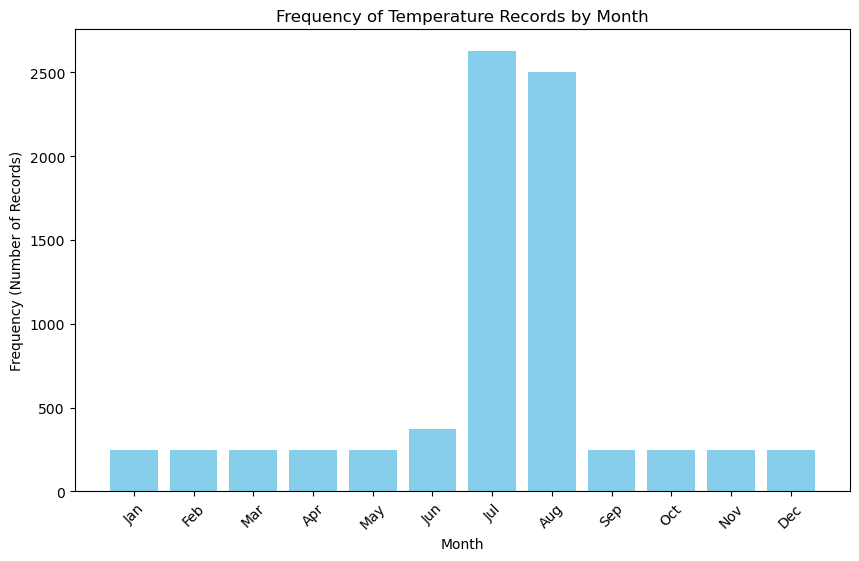

In [67]:

df['Month'] = df['Date'].dt.month

# Calculate the count of records for each month
month_counts = df['Month'].value_counts().sort_index()

# Define month names for labeling the x-axis
month_names = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

# Create a bar plot to show the frequency of records for each month
plt.figure(figsize=(10, 6))
plt.bar(month_names, month_counts, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Frequency (Number of Records)')
plt.title('Frequency of Temperature Records by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


#### As shown in the plot the recorded months mostly just for July and August,the entire monthst here are a lot of recordes missed from the entire months.

#### Since we have no other choice we will continue working on this data but only for July and August. It will be a prototype model to predict temperatures but for now just for July and August. Because collecting data is not that easy :)

In [68]:
# Filter the DataFrame to keep only July (Month == 7) and August (Month == 8) records
df = df[(df['Month'] == 7) | (df['Month'] == 8)]


In [69]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,Month
175,1.0,2013-07-07,25.9,20.1,7.0
176,2.0,2013-07-07,28.5,20.9,7.0
177,3.0,2013-07-07,28.5,23.0,7.0
178,4.0,2013-07-07,28.7,22.6,7.0
179,5.0,2013-07-07,30.8,21.8,7.0


### Check the missing dates on July and August

In [70]:

years = range(2013, 2019)

for year in years:
    # Create a date range for July and August in the current year
    start_date = pd.Timestamp(f'{year}-07-01')
    end_date = pd.Timestamp(f'{year}-08-31')
    date_range = pd.date_range(start_date, end_date)

    # Get the dates in your DataFrame for July and August in the current year
    dates_in_dataframe = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]['Date']

    # Find missing dates by comparing the date range with the dates in the DataFrame
    missing_dates = date_range[~date_range.isin(dates_in_dataframe)]

    print(f"Missing Dates in July and August {year}:")
    print(missing_dates)
    print()


Missing Dates in July and August 2013:
DatetimeIndex(['2013-07-01', '2013-07-02', '2013-07-03', '2013-07-04',
               '2013-07-05', '2013-07-06', '2013-07-09', '2013-07-10',
               '2013-07-11', '2013-07-12', '2013-08-01', '2013-08-02',
               '2013-08-03', '2013-08-04', '2013-08-05', '2013-08-06',
               '2013-08-09', '2013-08-10', '2013-08-11', '2013-08-12',
               '2013-08-31'],
              dtype='datetime64[ns]', freq=None)

Missing Dates in July and August 2014:
DatetimeIndex(['2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04',
               '2014-07-05', '2014-07-06', '2014-07-09', '2014-07-10',
               '2014-07-11', '2014-07-12', '2014-08-01', '2014-08-02',
               '2014-08-03', '2014-08-04', '2014-08-05', '2014-08-06',
               '2014-08-09', '2014-08-10', '2014-08-11', '2014-08-12',
               '2014-08-31'],
              dtype='datetime64[ns]', freq=None)

Missing Dates in July and August 2015:
DatetimeIndex

#### The missing dates of July and August are regular for each year, but in 2018 all July and August records are missed, so we will exept this year. As a result, we will train our model to predict temperatures in ranges of : (13-7 t0 30-7) & (13-8 to 30-8)

In [71]:
df = df[df['Date'].dt.year != 2018]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5125 entries, 175 to 7749
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   station       5125 non-null   float64       
 1   Date          5125 non-null   datetime64[ns]
 2   Present_Tmax  5090 non-null   float64       
 3   Present_Tmin  5090 non-null   float64       
 4   Month         5125 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 240.2 KB


**Now let's go a step back to the missing values**
#### Impute the missing values:

In [73]:
df = df.dropna(subset=['station'])

df['Present_Tmax'].fillna(df['Present_Tmax'].mean(), inplace=True)
df['Present_Tmin'].fillna(df['Present_Tmin'].mean(), inplace=True)



In [74]:
df.isnull().sum()

station         0
Date            0
Present_Tmax    0
Present_Tmin    0
Month           0
dtype: int64

## Check stationarity for each station:

Station: 1.0


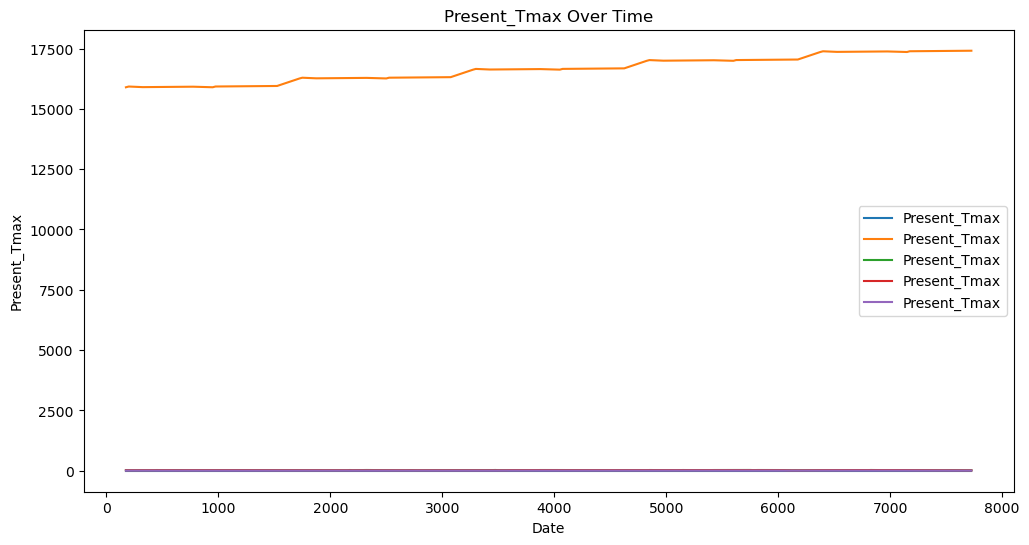

ADF Statistic: -7.433184953251002
p-value: 6.281959673157426e-11
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 2.0


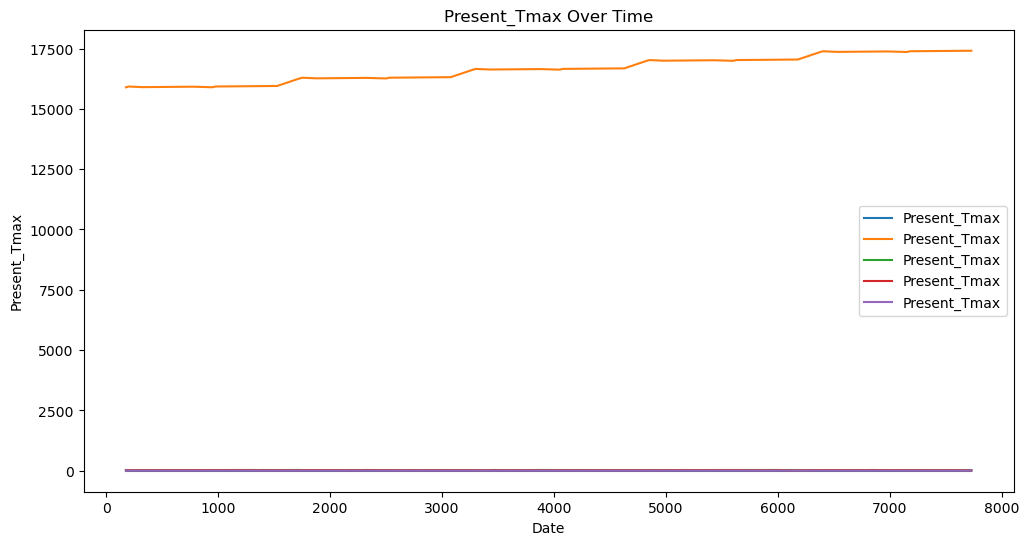

ADF Statistic: -7.564807367222286
p-value: 2.944925384498365e-11
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 3.0


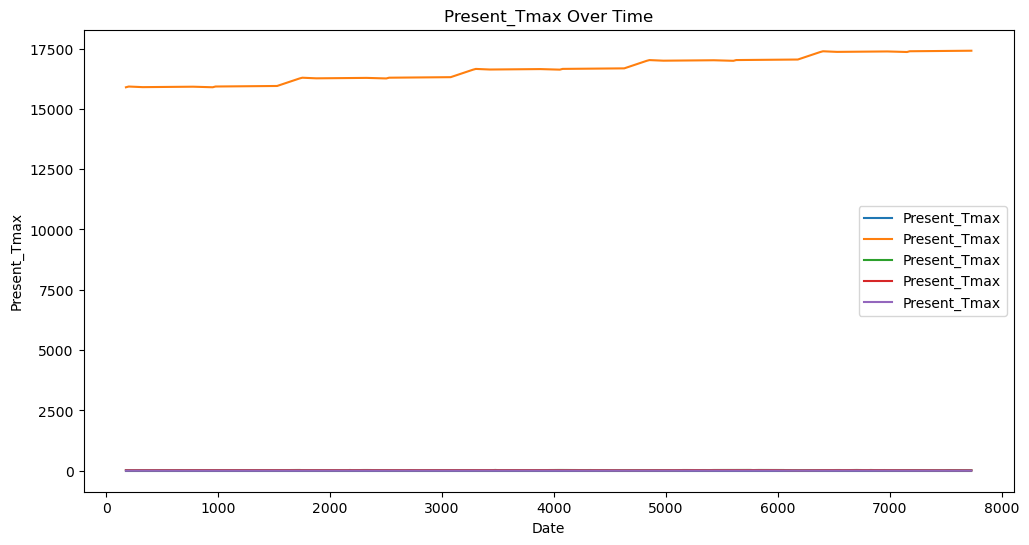

ADF Statistic: -7.331436670317184
p-value: 1.1251378421441808e-10
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 4.0


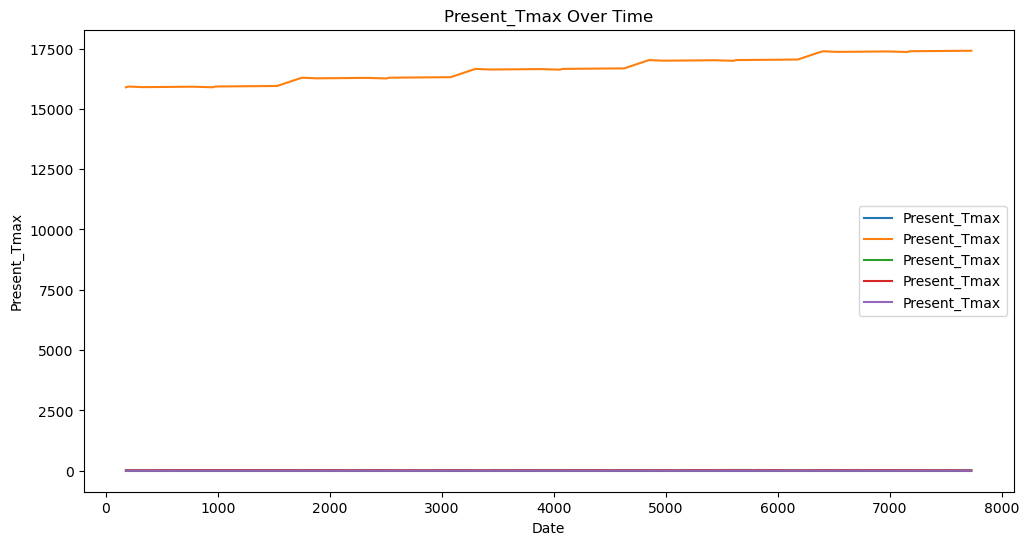

ADF Statistic: -7.307794771564467
p-value: 1.287813997965355e-10
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 5.0


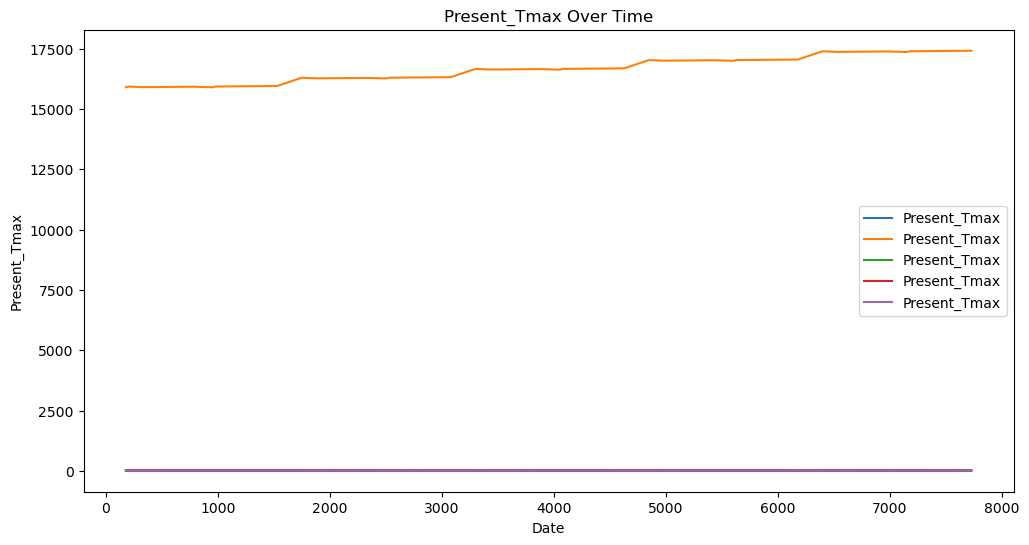

ADF Statistic: -7.20498755178558
p-value: 2.3127000386101155e-10
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 6.0


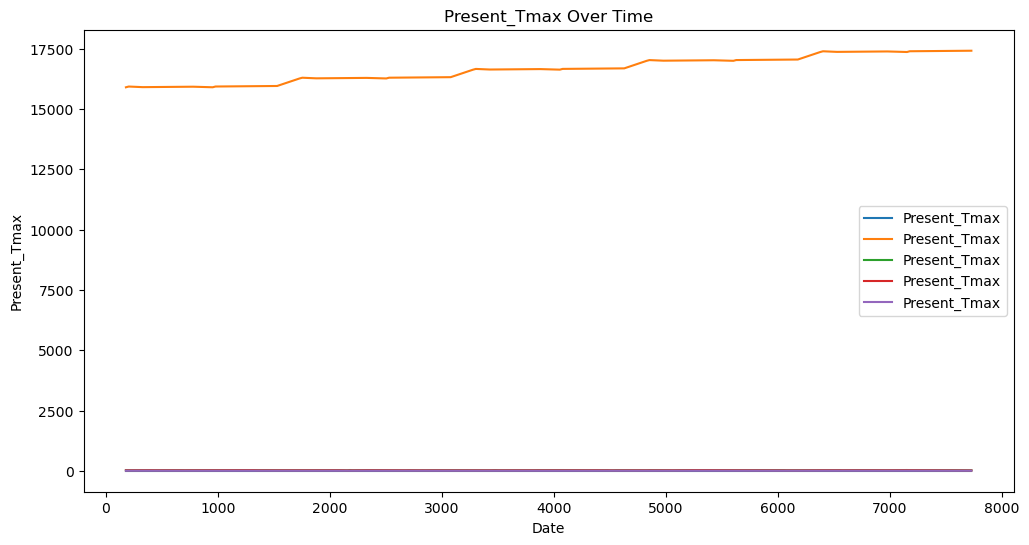

ADF Statistic: -7.193595120716143
p-value: 2.467269214408043e-10
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 7.0


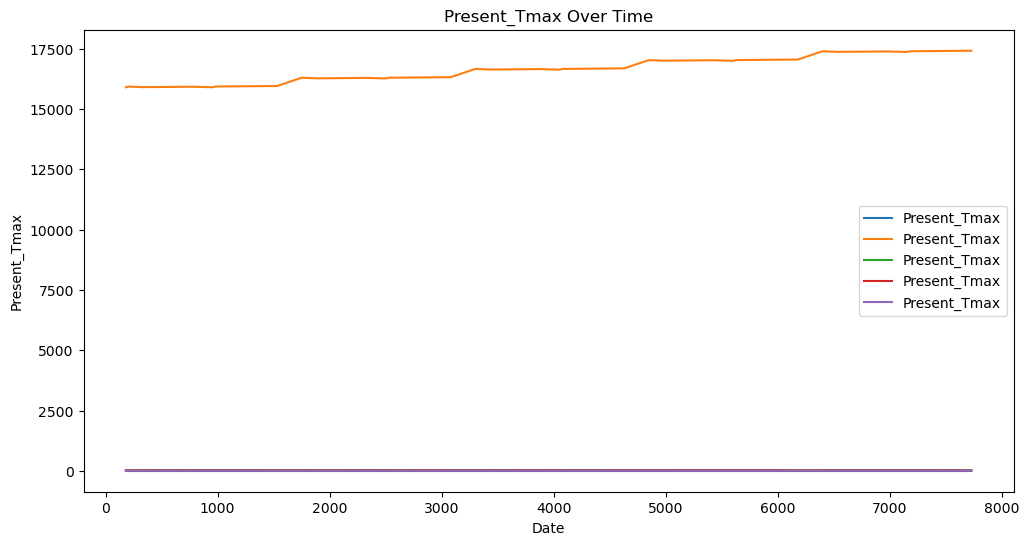

ADF Statistic: -7.271988671247623
p-value: 1.579620620956204e-10
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 8.0


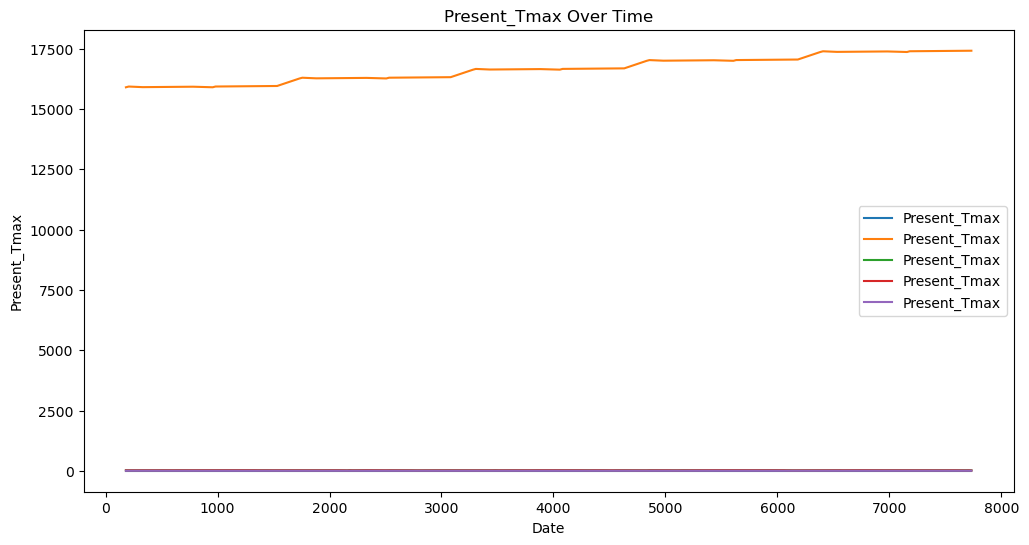

ADF Statistic: -7.854144489567405
p-value: 5.500002612510243e-12
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 9.0


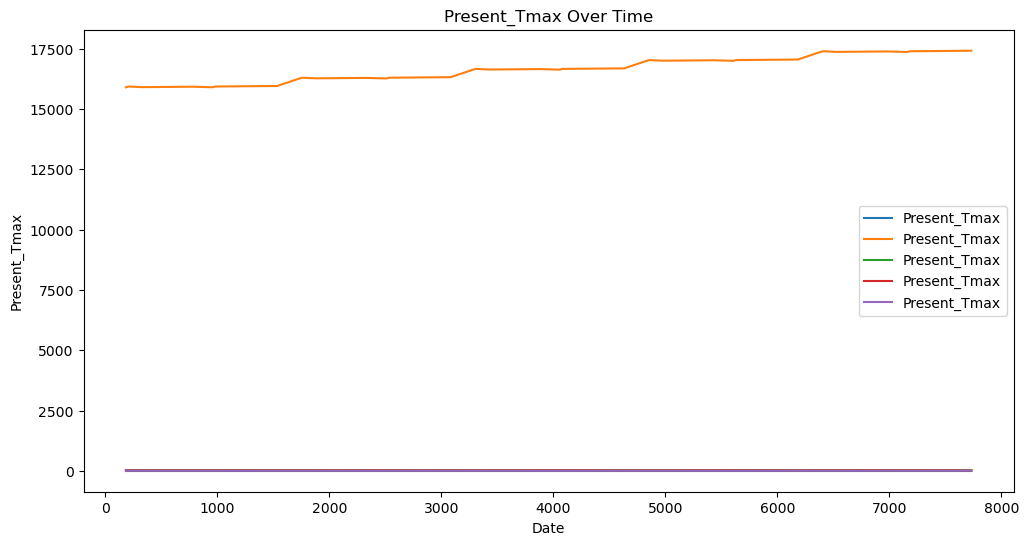

ADF Statistic: -7.77610058591267
p-value: 8.661252434078091e-12
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 10.0


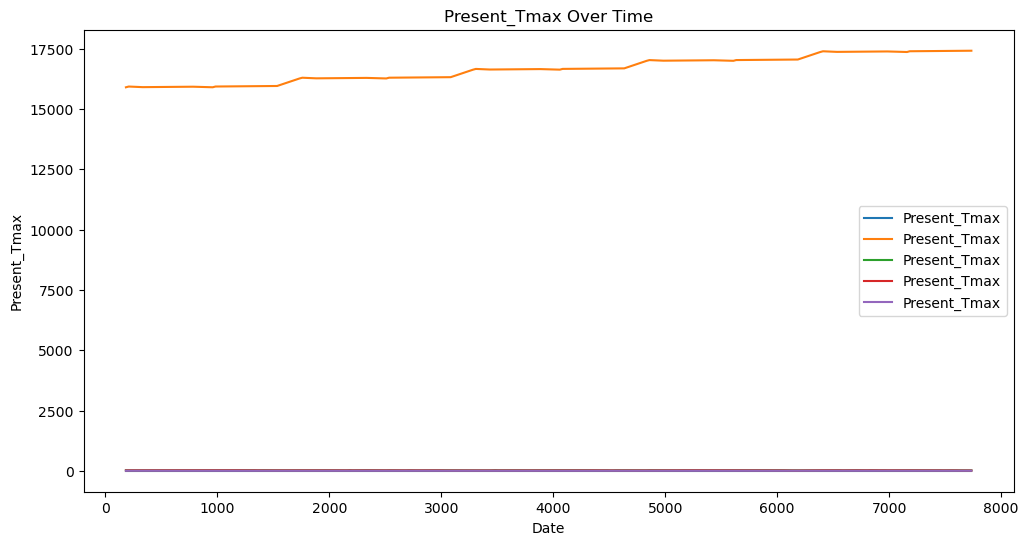

ADF Statistic: -7.520397176505345
p-value: 3.8043358198592266e-11
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 11.0


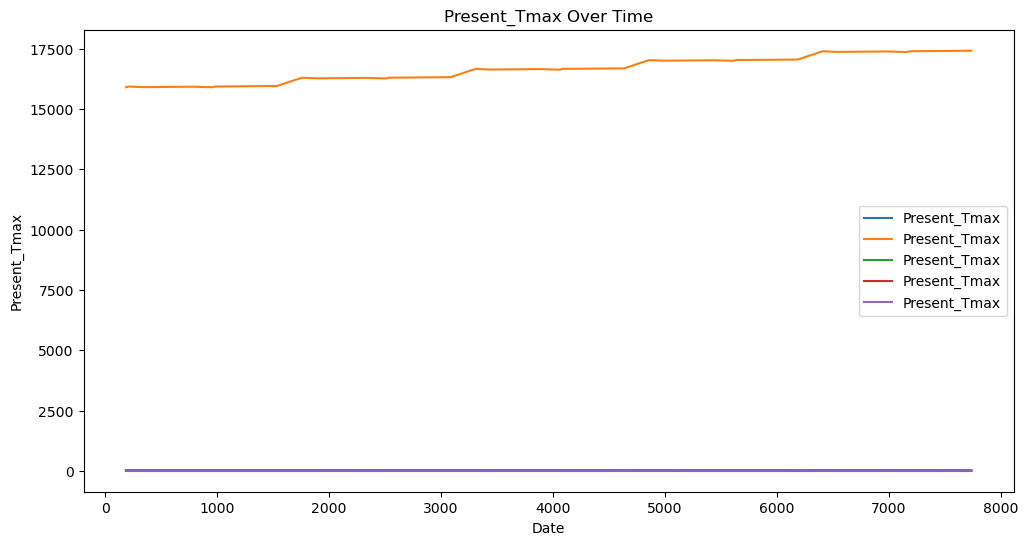

ADF Statistic: -7.349535250223177
p-value: 1.0145339230911608e-10
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 12.0


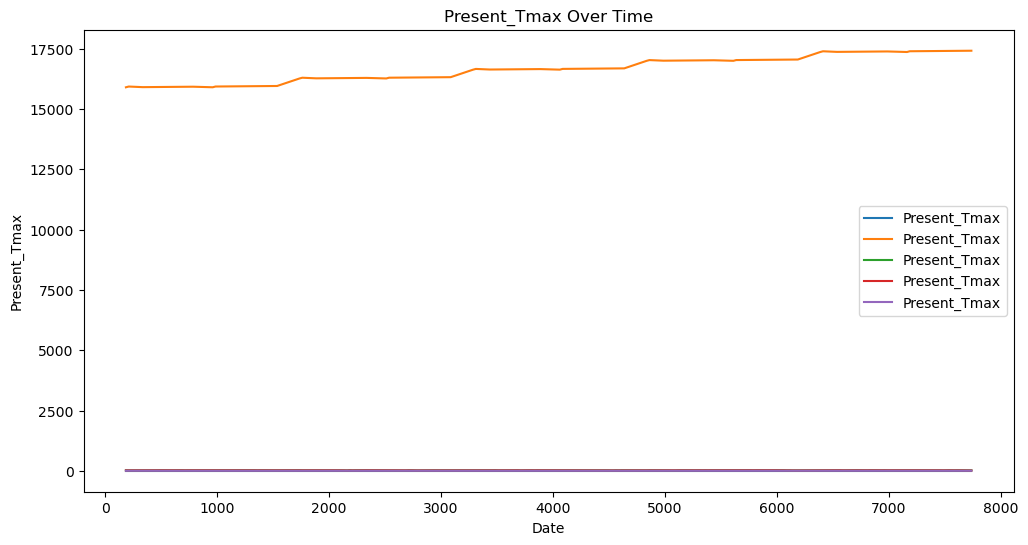

ADF Statistic: -7.943305856984522
p-value: 3.269873480626318e-12
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 13.0


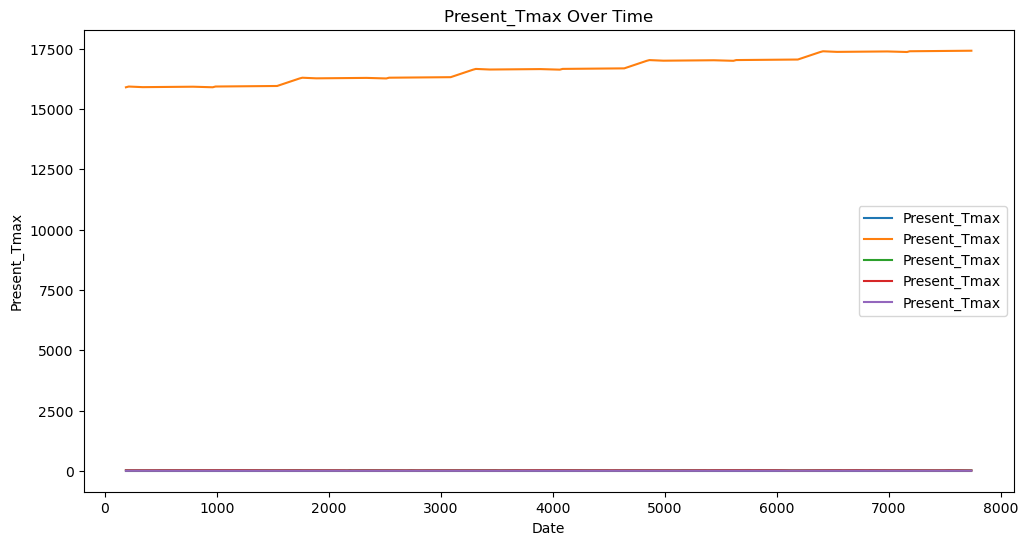

ADF Statistic: -7.65179150243548
p-value: 1.7812883368016255e-11
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 14.0


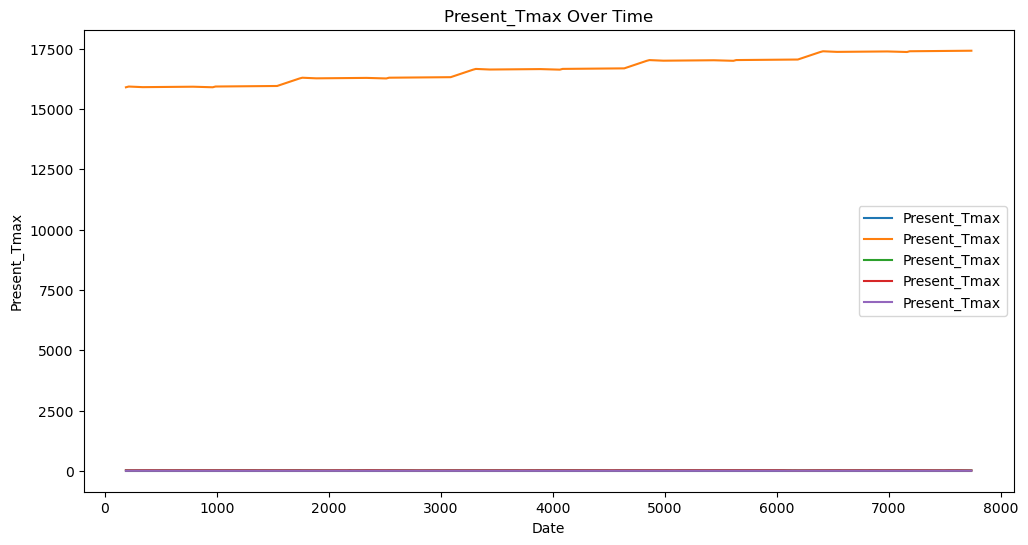

ADF Statistic: -7.524530965163458
p-value: 3.7148022855008375e-11
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 15.0


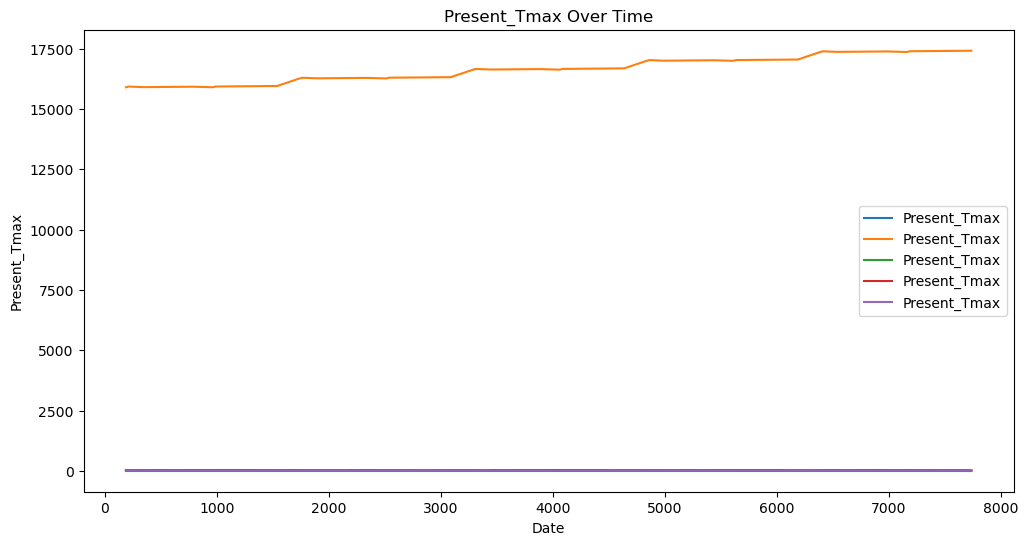

ADF Statistic: -7.6171967379804855
p-value: 2.1759679258524835e-11
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 16.0


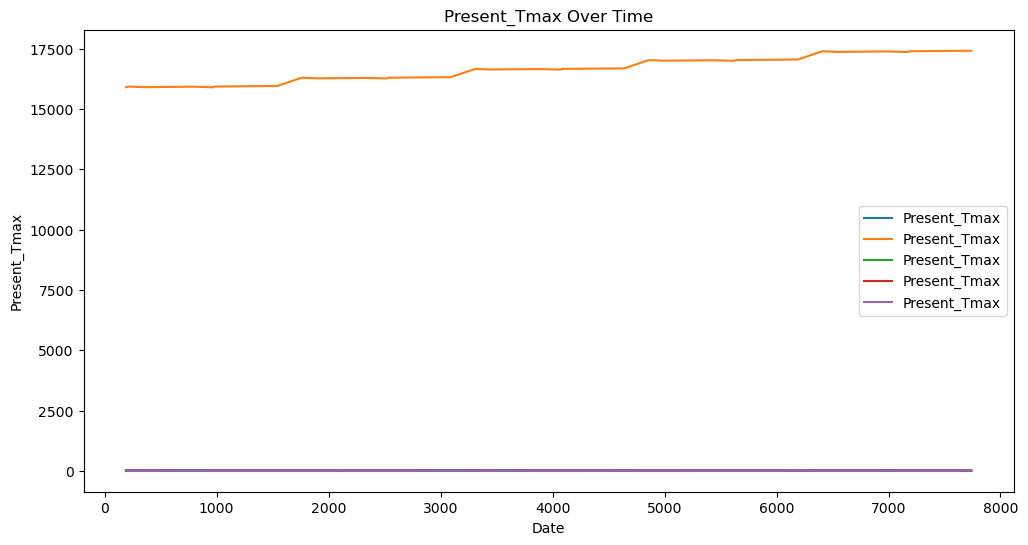

ADF Statistic: -7.654582879098452
p-value: 1.7527356290015318e-11
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 17.0


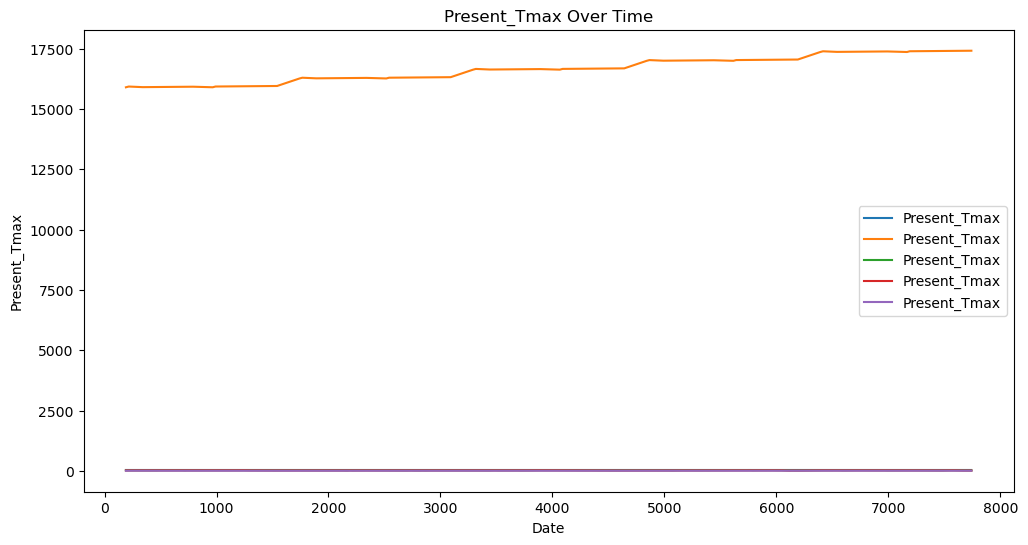

ADF Statistic: -7.72675046182387
p-value: 1.1535893674281253e-11
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 18.0


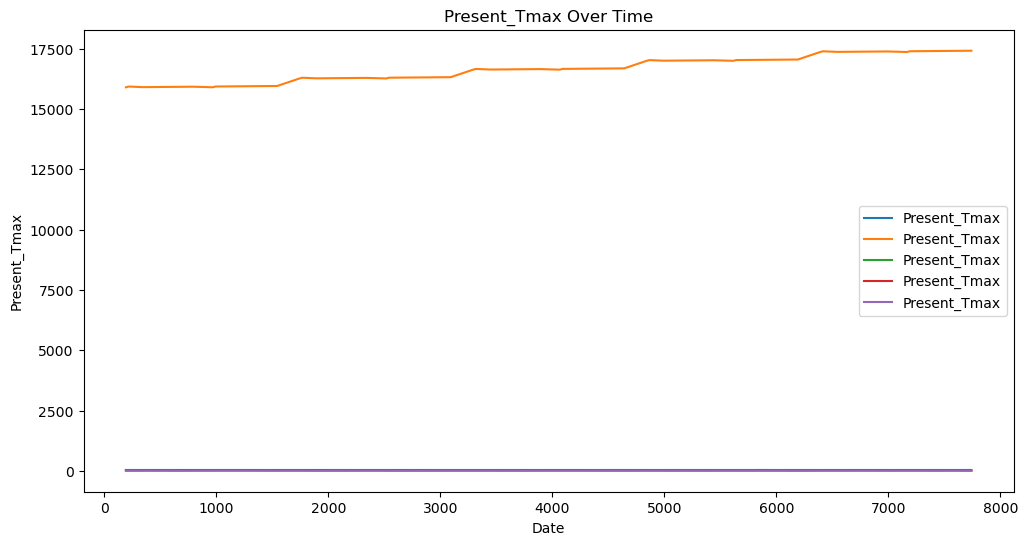

ADF Statistic: -7.525403880600622
p-value: 3.696165186755488e-11
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 19.0


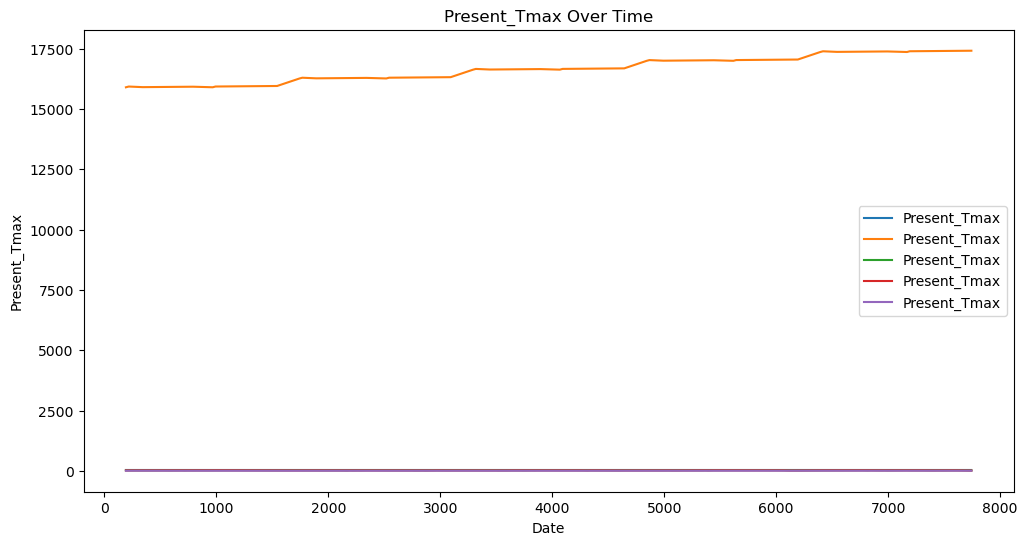

ADF Statistic: -7.625975689777259
p-value: 2.0682624389341638e-11
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 20.0


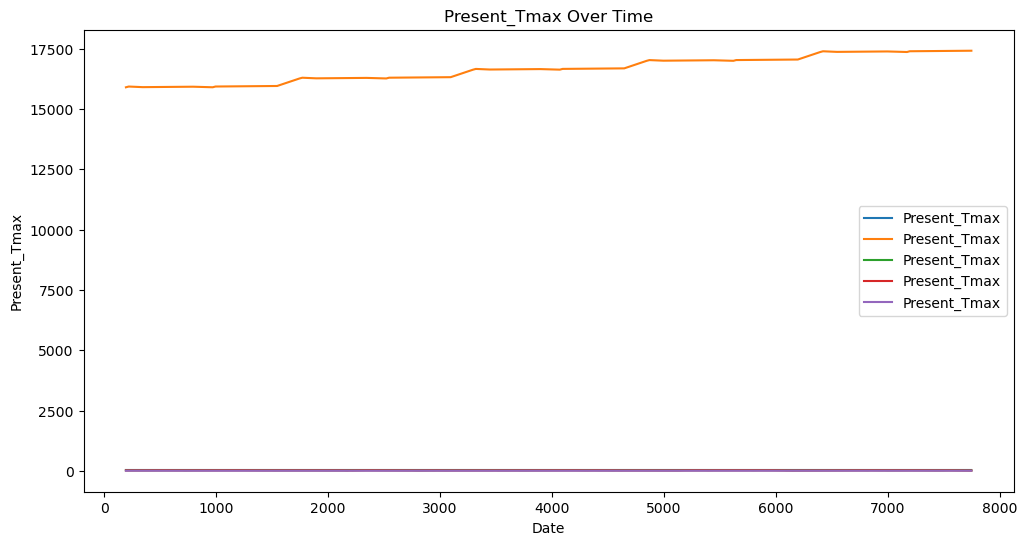

ADF Statistic: -7.536888318942352
p-value: 3.459445809820323e-11
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 21.0


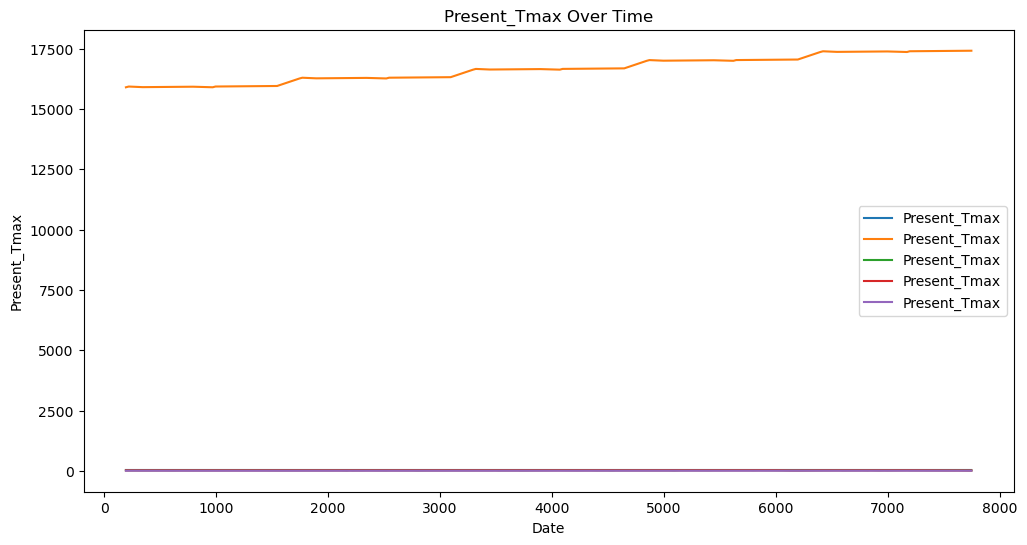

ADF Statistic: -7.346353843158931
p-value: 1.0331627474317349e-10
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 22.0


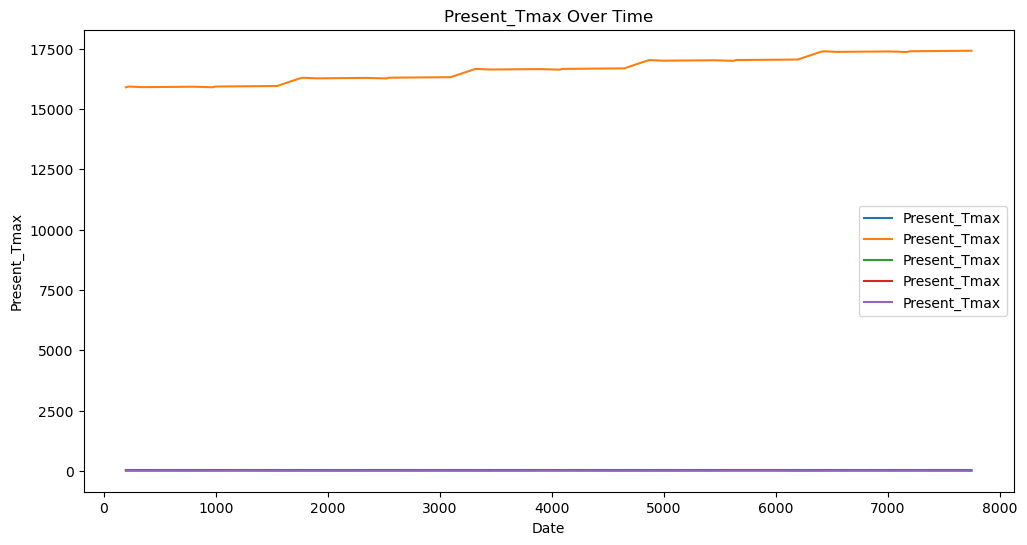

ADF Statistic: -7.179958236671856
p-value: 2.6658024738514157e-10
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 23.0


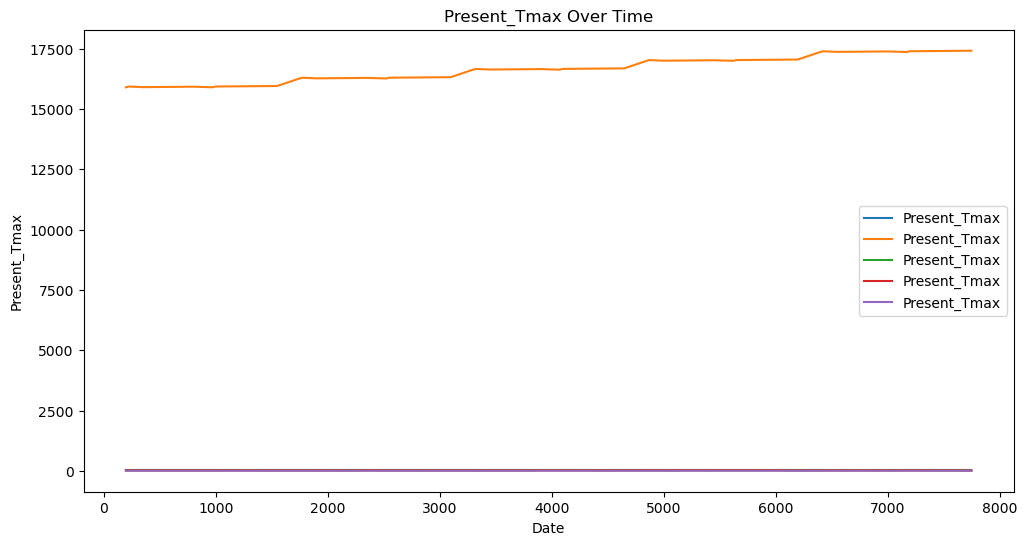

ADF Statistic: -7.295242305415
p-value: 1.3834561328186633e-10
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 24.0


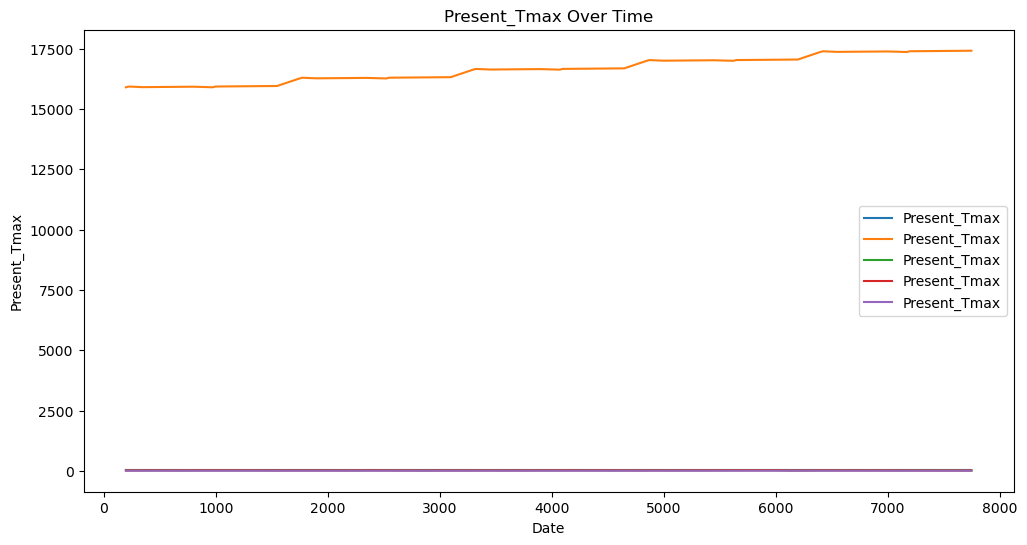

ADF Statistic: -7.509676962589635
p-value: 4.046635586443935e-11
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 25.0


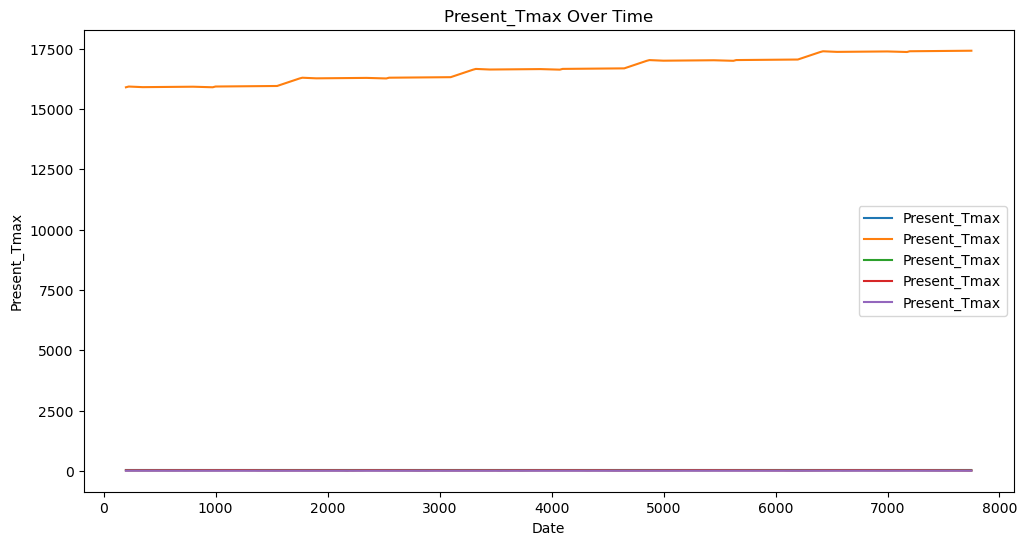

ADF Statistic: -7.232616330958826
p-value: 1.9765678728916247e-10
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)


In [75]:
def check_stationarity(df):
    # Plot the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(df, label='Present_Tmax')
    plt.xlabel('Date')
    plt.ylabel('Present_Tmax')
    plt.title('Present_Tmax Over Time')
    plt.legend()
    plt.show()

    # Perform Augmented Dickey-Fuller test for stationarity
    result = adfuller(df['Present_Tmax'])
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")
    
    if result[1] <= 0.05:
        print("The data is stationary (reject the null hypothesis)")
    else:
        print("The data is non-stationary (fail to reject the null hypothesis)")

# Group by station and check stationarity
station_groups = df.groupby('station')
for station, station_data in station_groups:
    print(f"Station: {station}")
    check_stationarity(station_data)


#### Based on the results  provided, it appears that for each station (from Station 1.0 to Station 25.0), the Augmented Dickey-Fuller (ADF) test statistics are significantly negative, and the associated p-values are very close to zero (e.g., in the range of 1e-12 to 3e-11). This suggests that the data for all stations is stationary :)

**Stationary data** means that the statistical properties of the data, such as mean, variance, and autocorrelation, do not change over time. 

**Non-stationary** data often exhibit trends or seasonality, which can make it more challenging to model and predict.

## For Tmin?

Station: 1.0


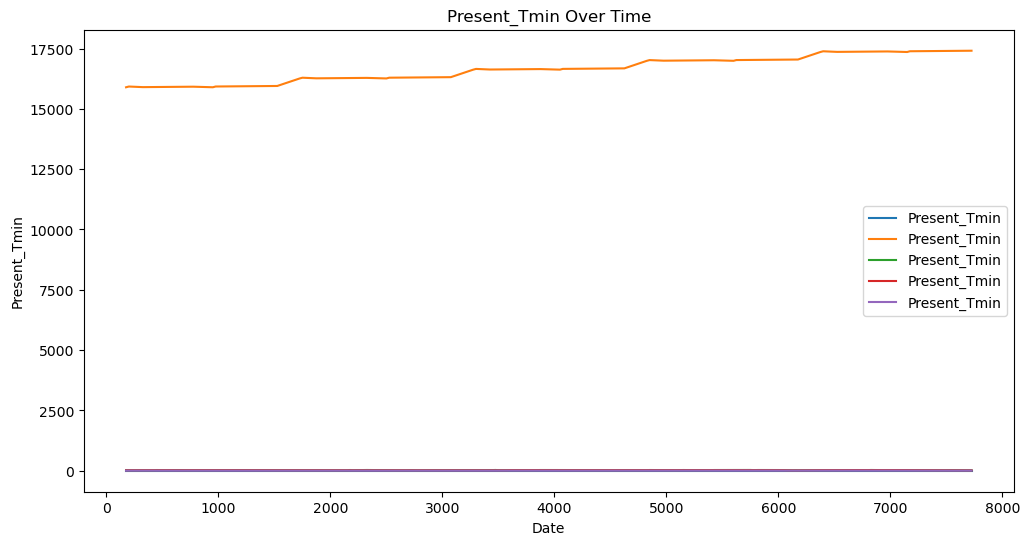

ADF Statistic: -3.820829345246579
p-value: 0.002701250419283427
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
The data is stationary (reject the null hypothesis)
Station: 2.0


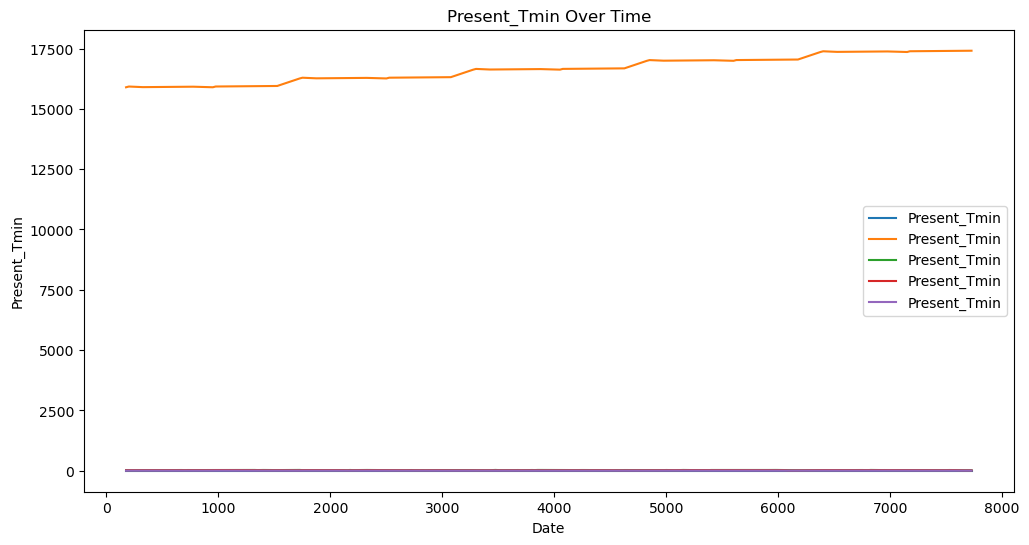

ADF Statistic: -4.832654669985513
p-value: 4.7080248174776516e-05
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 3.0


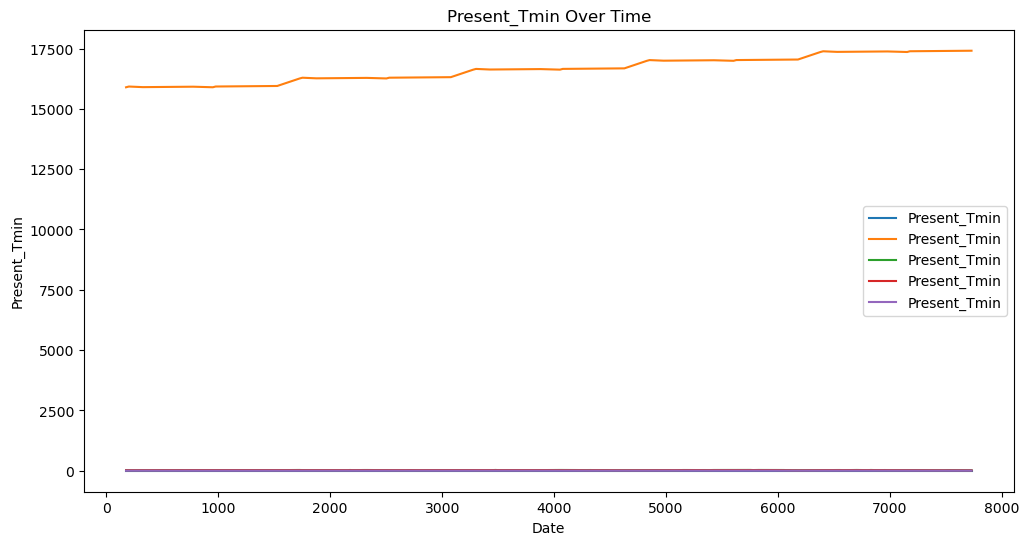

ADF Statistic: -4.612410388651847
p-value: 0.00012253452805532496
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 4.0


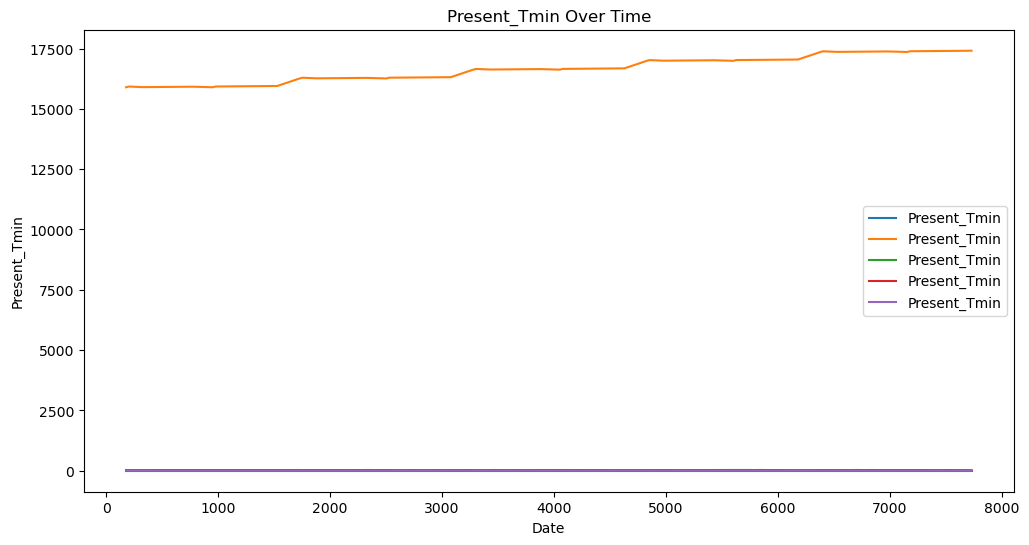

ADF Statistic: -3.850913371506541
p-value: 0.002427313816552347
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
The data is stationary (reject the null hypothesis)
Station: 5.0


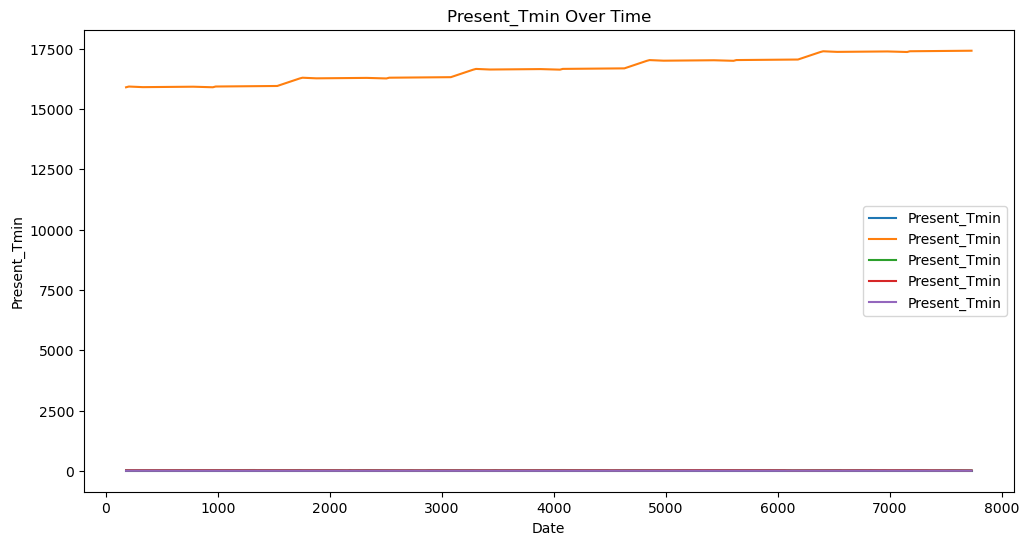

ADF Statistic: -5.011828617113593
p-value: 2.1027447507253063e-05
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 6.0


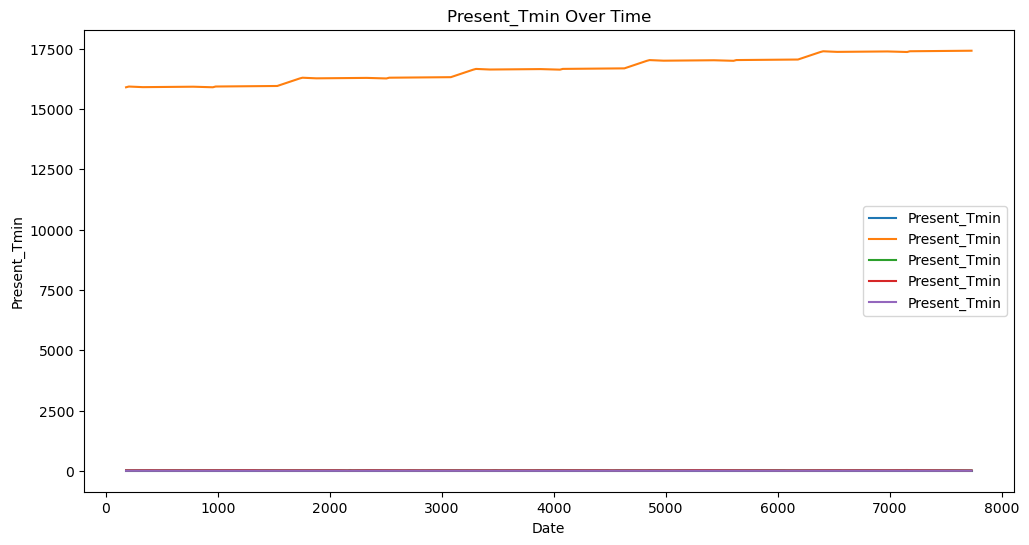

ADF Statistic: -4.8272489263948914
p-value: 4.8220814064035036e-05
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 7.0


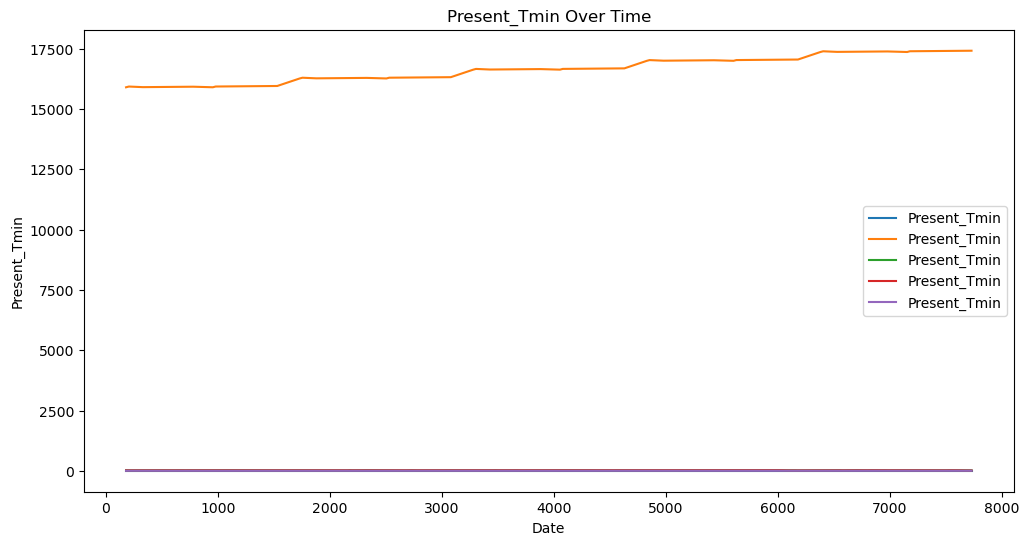

ADF Statistic: -4.120953111690544
p-value: 0.000894104723897861
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
The data is stationary (reject the null hypothesis)
Station: 8.0


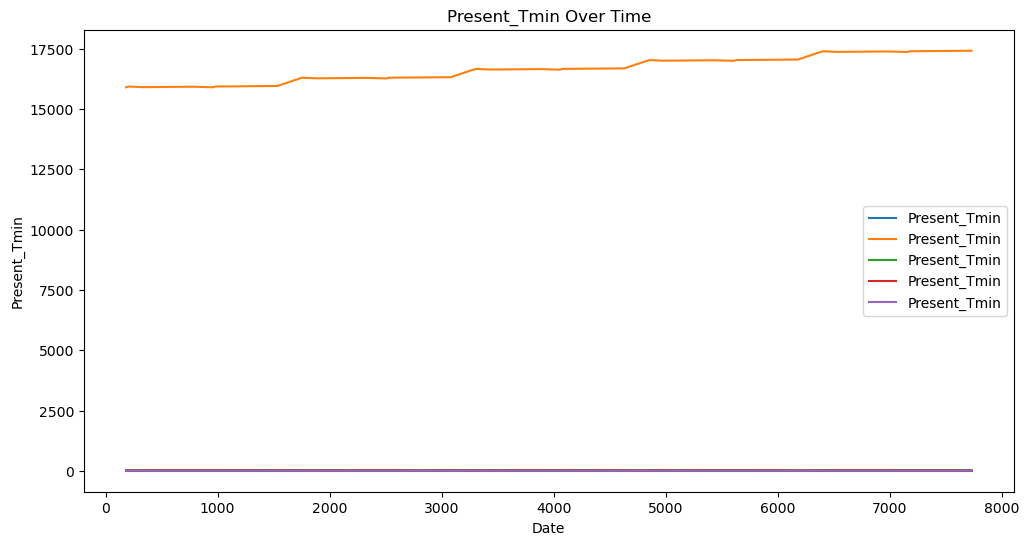

ADF Statistic: -4.003901096587349
p-value: 0.0013902211611524272
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
The data is stationary (reject the null hypothesis)
Station: 9.0


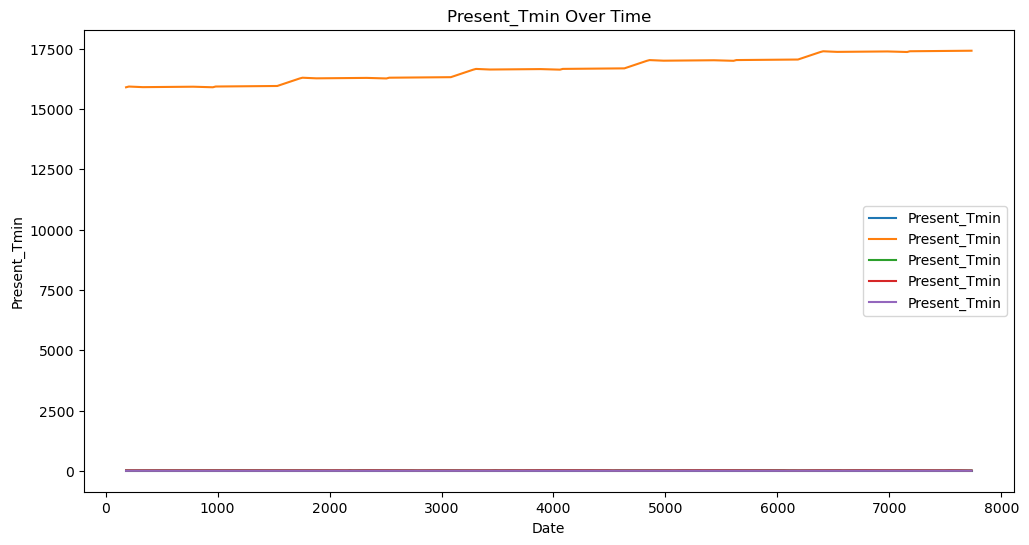

ADF Statistic: -3.6065551767108355
p-value: 0.005636936409100265
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
The data is stationary (reject the null hypothesis)
Station: 10.0


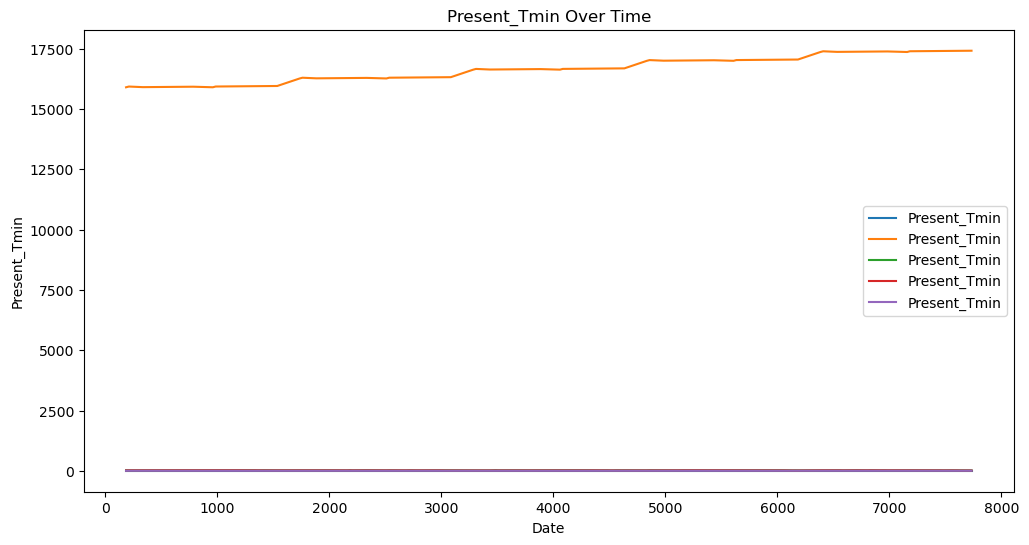

ADF Statistic: -4.842311061007084
p-value: 4.510700935215966e-05
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 11.0


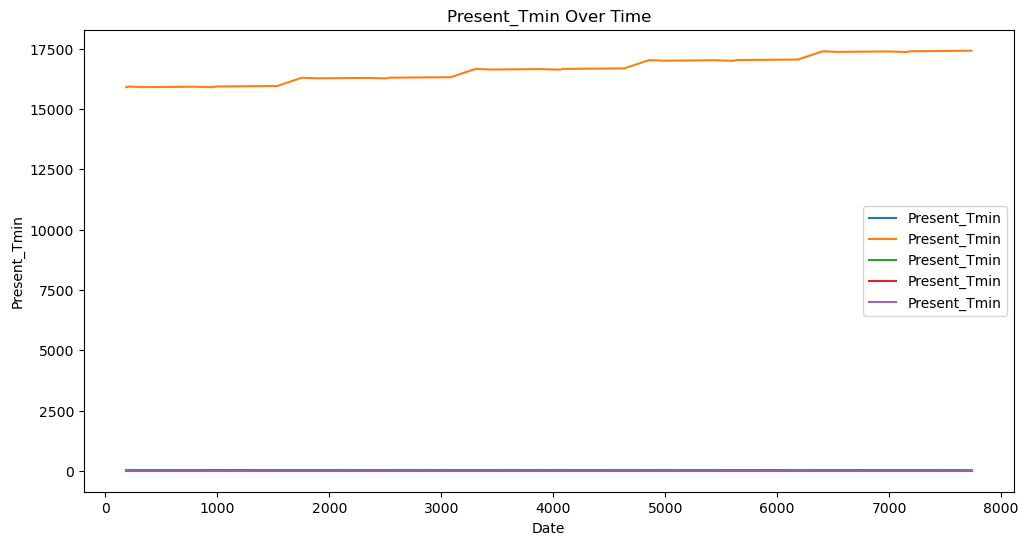

ADF Statistic: -5.155110642442301
p-value: 1.0849989031989815e-05
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 12.0


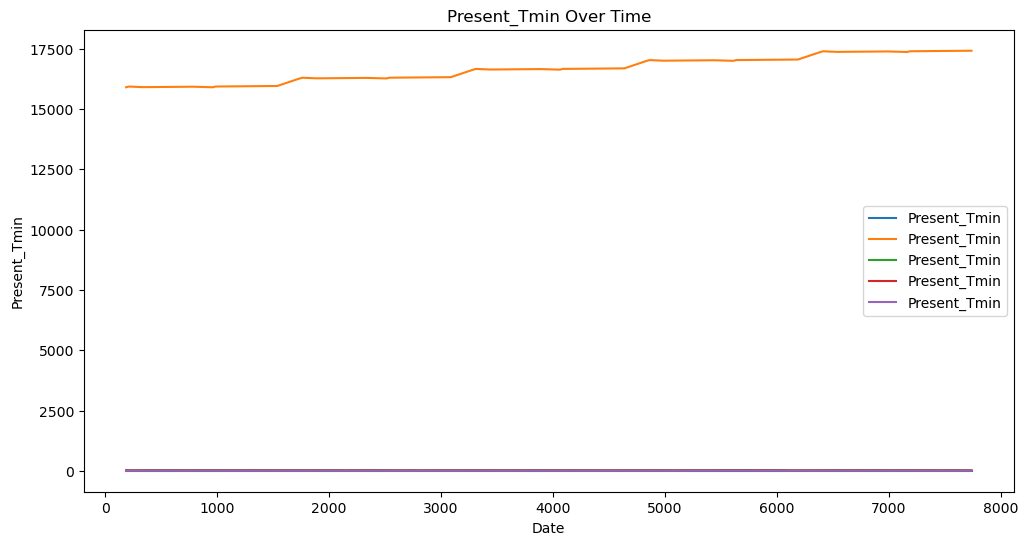

ADF Statistic: -4.647657353672989
p-value: 0.00010541804928970222
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 13.0


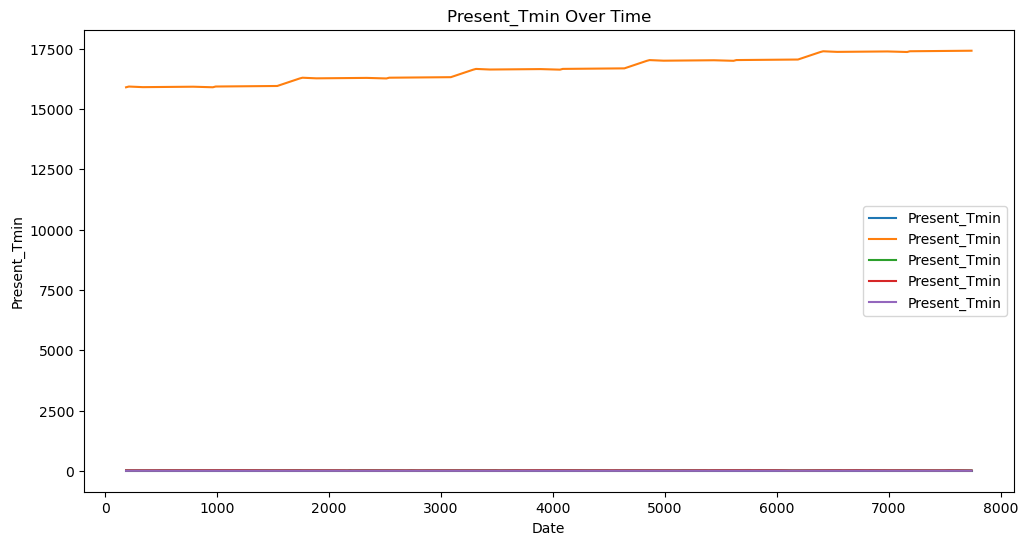

ADF Statistic: -3.894316537326903
p-value: 0.0020770746934885963
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
The data is stationary (reject the null hypothesis)
Station: 14.0


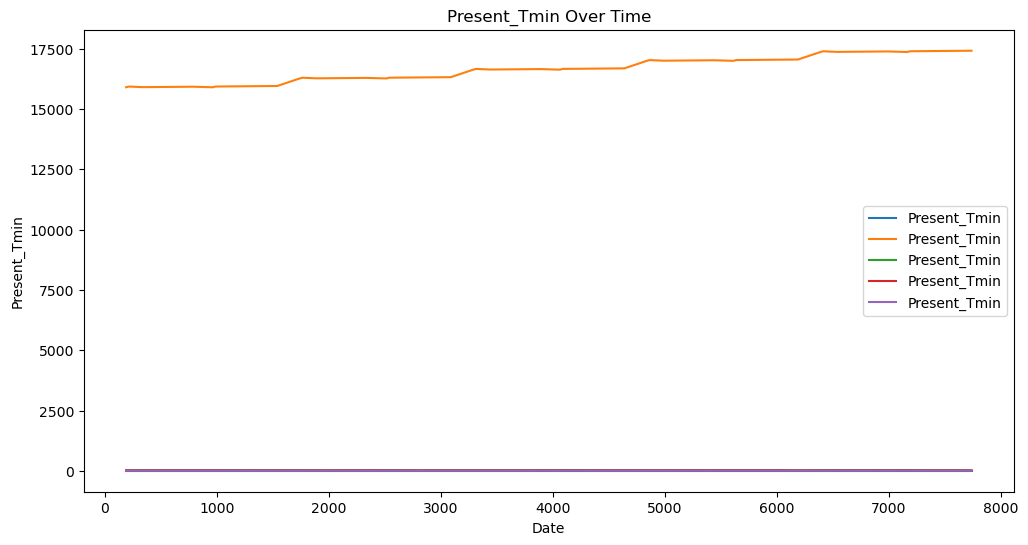

ADF Statistic: -3.920321793361192
p-value: 0.001890277206374549
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
The data is stationary (reject the null hypothesis)
Station: 15.0


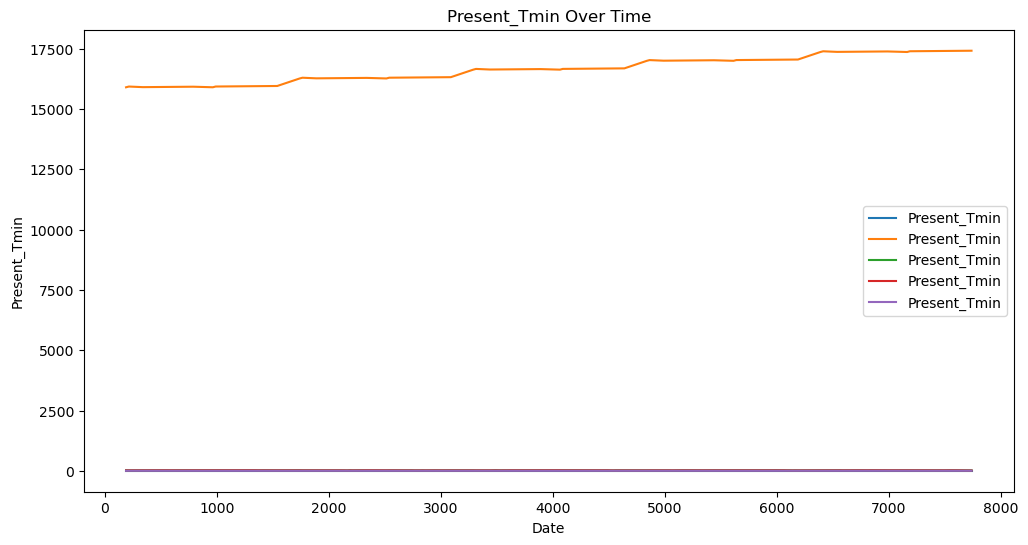

ADF Statistic: -4.753305824243427
p-value: 6.674808526021449e-05
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 16.0


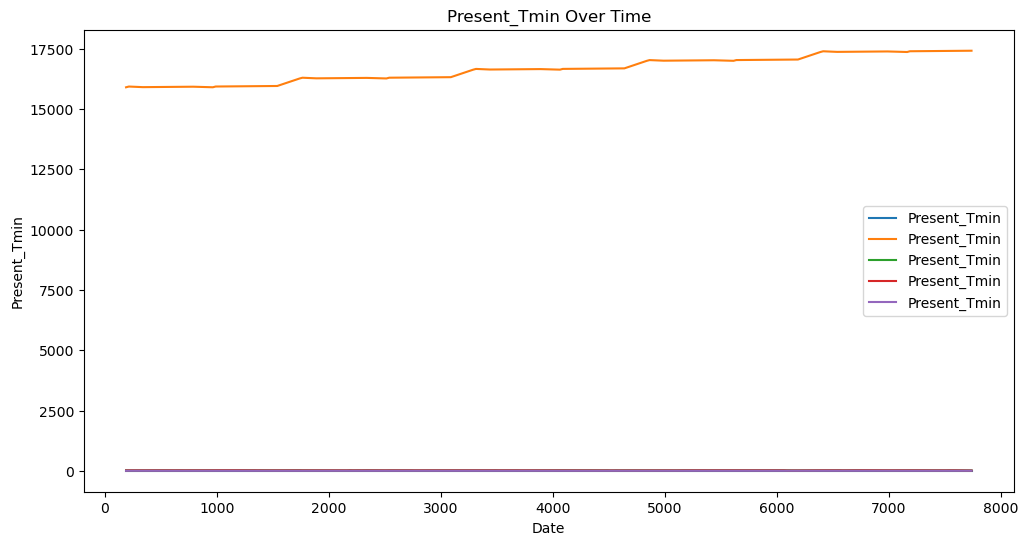

ADF Statistic: -4.937762564134199
p-value: 2.9428410367060296e-05
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 17.0


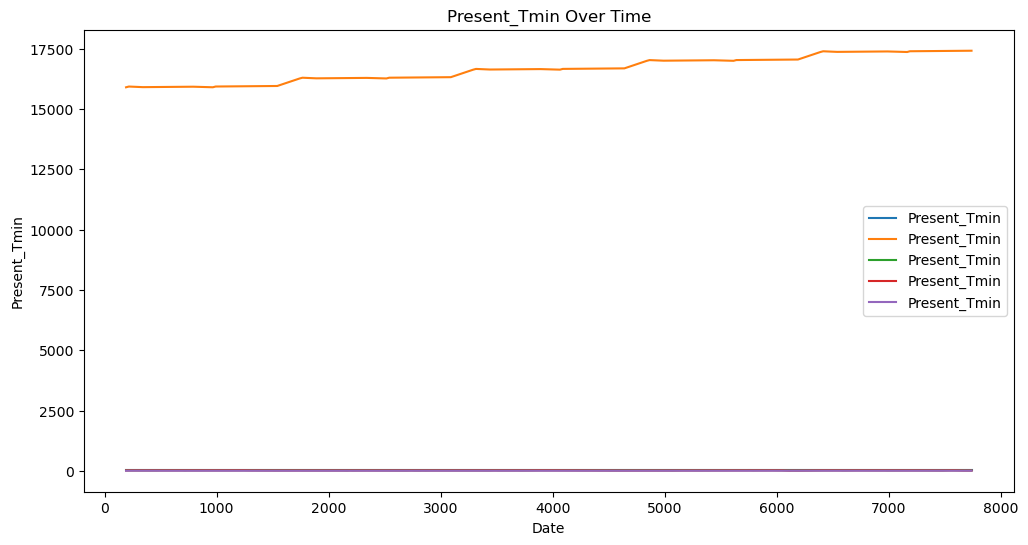

ADF Statistic: -5.513316636560865
p-value: 1.9499946464154458e-06
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 18.0


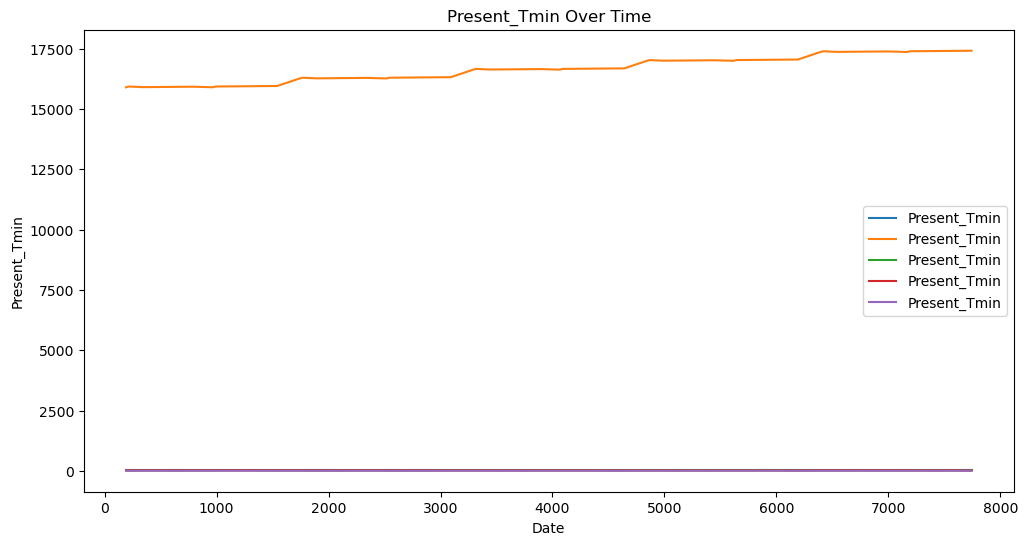

ADF Statistic: -4.871225822420525
p-value: 3.96622781669325e-05
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 19.0


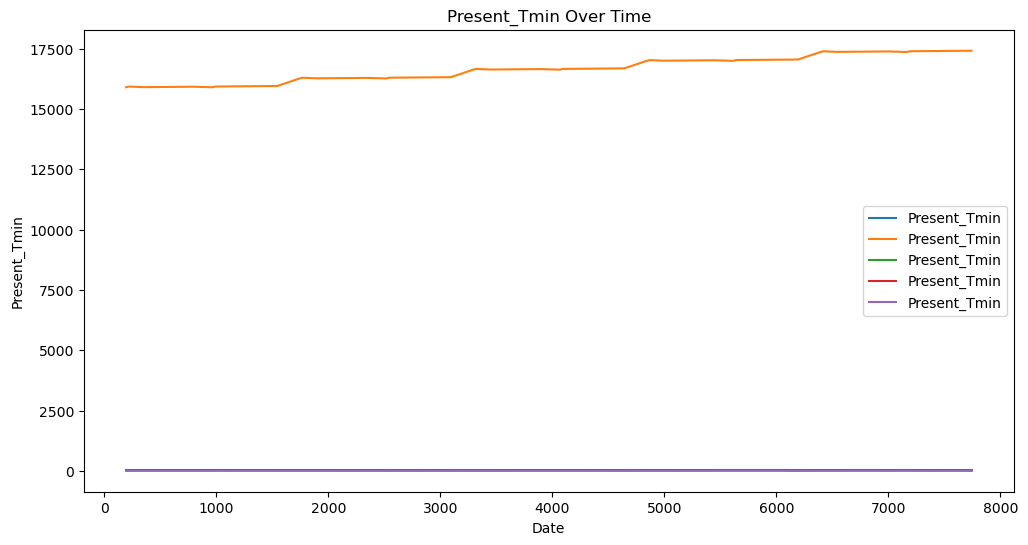

ADF Statistic: -4.834077596990676
p-value: 4.6784357870310884e-05
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 20.0


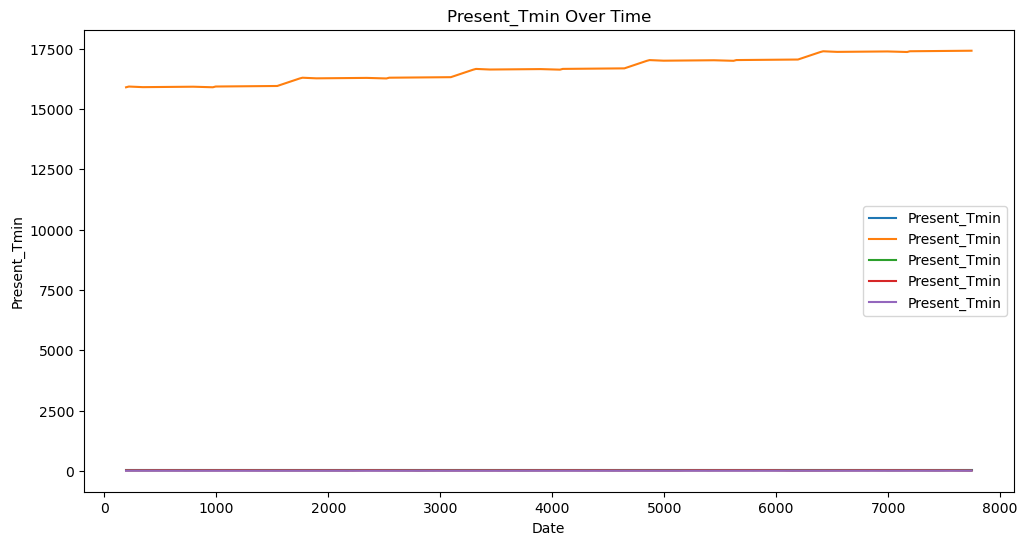

ADF Statistic: -3.8540702136418106
p-value: 0.0024001071768628515
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
The data is stationary (reject the null hypothesis)
Station: 21.0


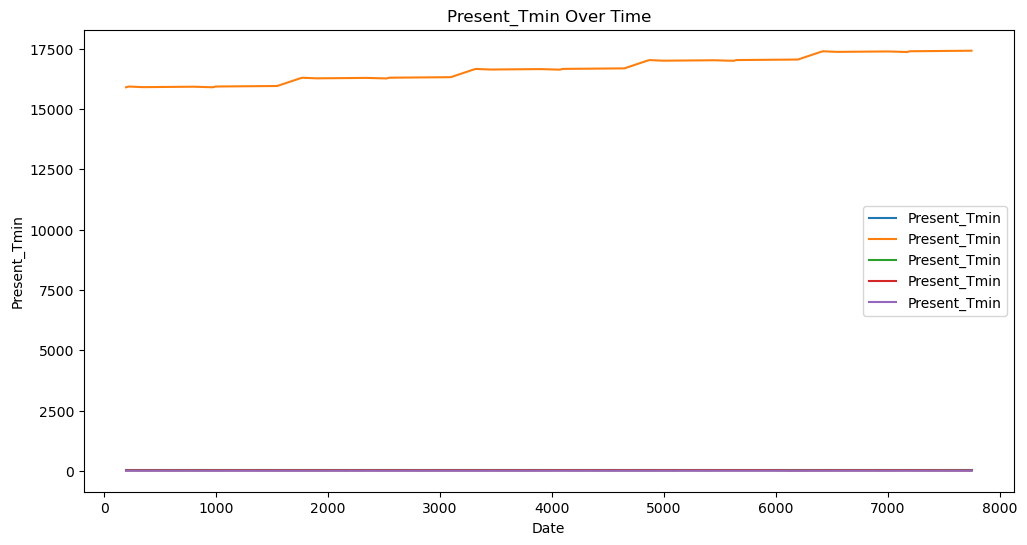

ADF Statistic: -4.97613044067329
p-value: 2.4738165594970617e-05
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 22.0


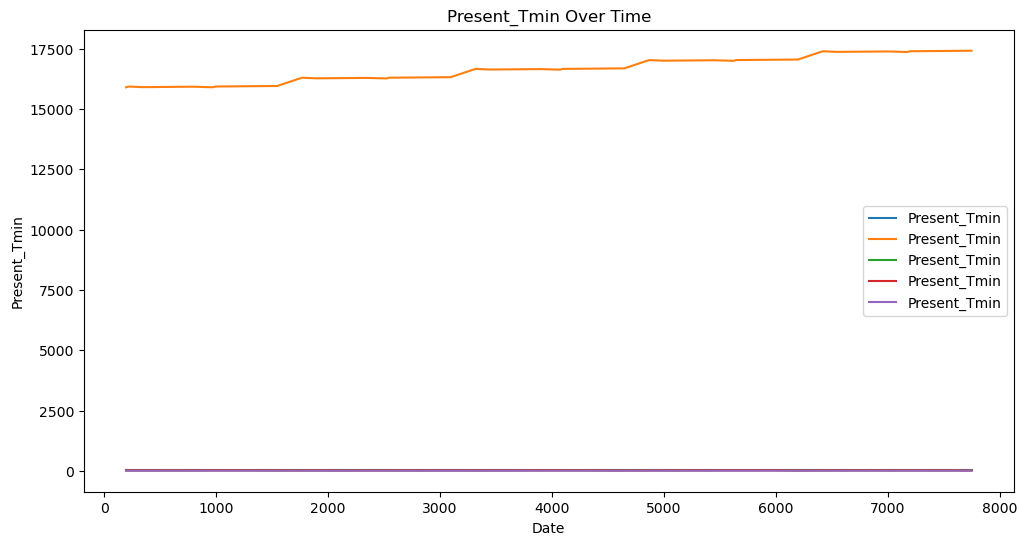

ADF Statistic: -4.4584618245692
p-value: 0.0002335658952114827
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)
Station: 23.0


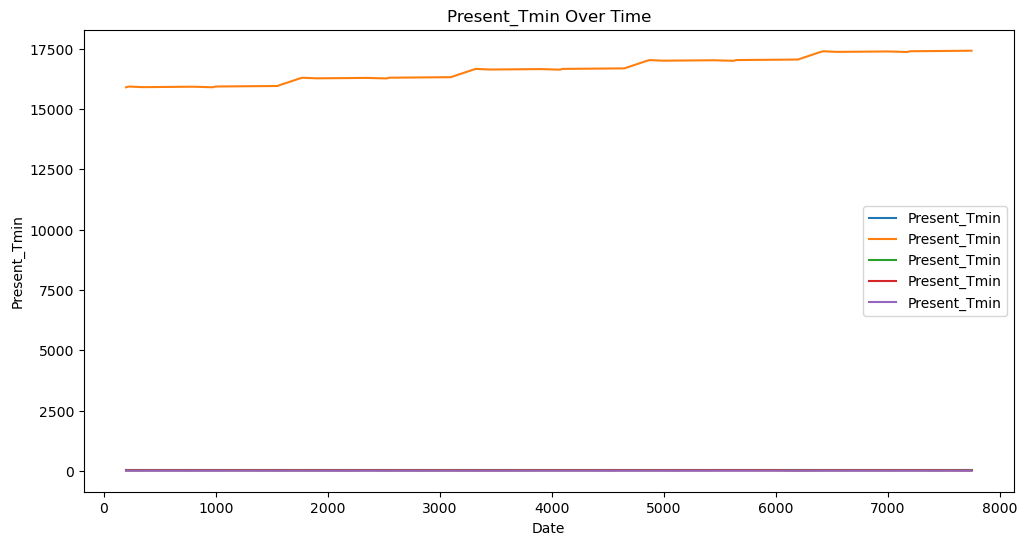

ADF Statistic: -4.166943717858692
p-value: 0.0007491345675380721
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
The data is stationary (reject the null hypothesis)
Station: 24.0


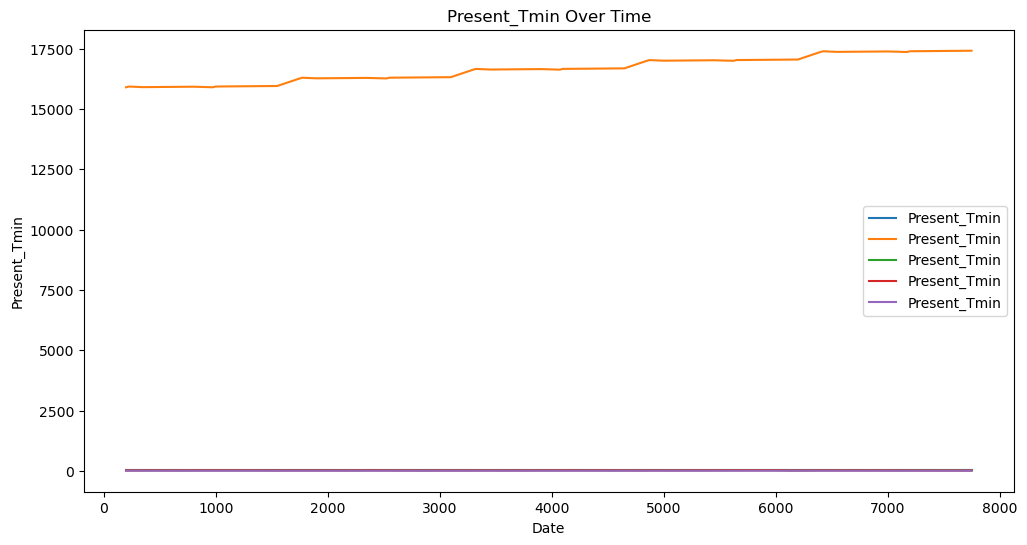

ADF Statistic: -4.204252379417307
p-value: 0.0006480639839231107
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
The data is stationary (reject the null hypothesis)
Station: 25.0


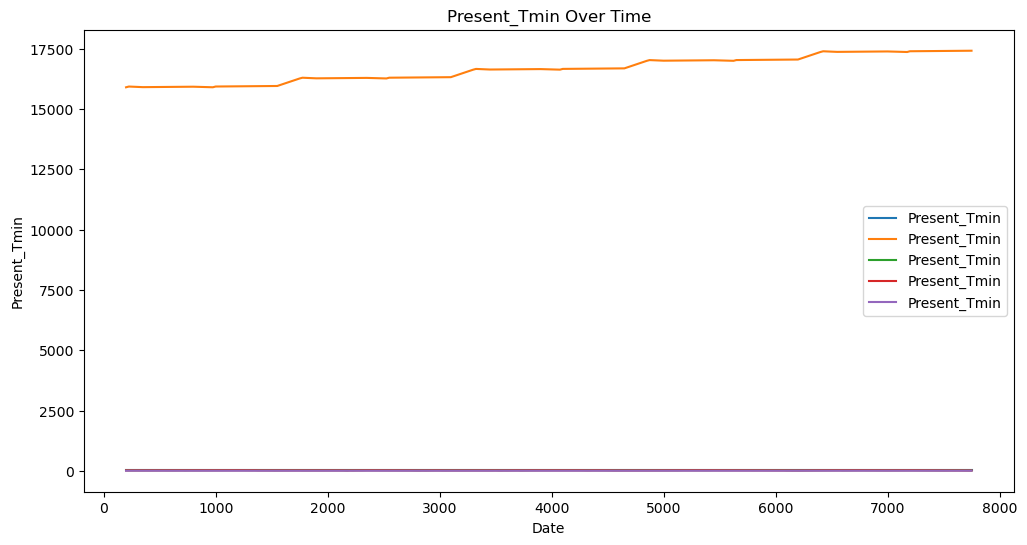

ADF Statistic: -5.0273129018893385
p-value: 1.959045256336062e-05
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
The data is stationary (reject the null hypothesis)


In [76]:
def check_stationarity(df):
    # Plot the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(df, label='Present_Tmin')
    plt.xlabel('Date')
    plt.ylabel('Present_Tmin')
    plt.title('Present_Tmin Over Time')
    plt.legend()
    plt.show()

    # Perform Augmented Dickey-Fuller test for stationarity
    result = adfuller(df['Present_Tmin'])
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")
    
    if result[1] <= 0.05:
        print("The data is stationary (reject the null hypothesis)")
    else:
        print("The data is non-stationary (fail to reject the null hypothesis)")

# Group by station and check stationarity
station_groups = df.groupby('station')
for station, station_data in station_groups:
    print(f"Station: {station}")
    check_stationarity(station_data)


#### This indicates that the 'Present_Tmin' temperature data for all stations is stationary.

#### Since Our data is already stationary, we can proceed with modeling time series data. One common approach for time series forecasting is using the ARIMA (AutoRegressive Integrated Moving Average) model. We can fit ARIMA models for each station to make predictions.

## EDA Q

#### 1. How does the temperature vary over time?



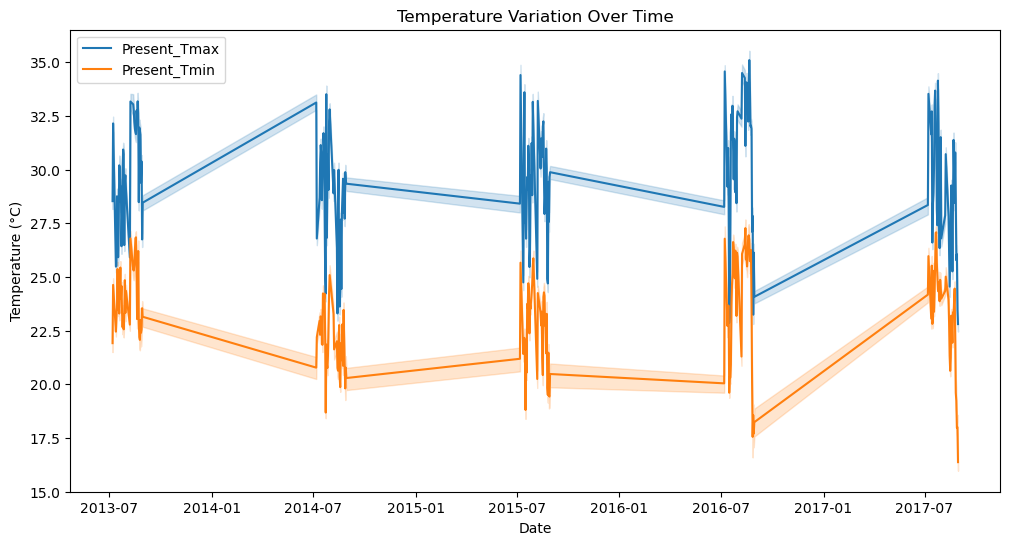

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot of 'Present_Tmax' and 'Present_Tmin' over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Present_Tmax', label='Present_Tmax')
sns.lineplot(data=df, x='Date', y='Present_Tmin', label='Present_Tmin')
plt.title('Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


#### From this plot we recognized that the temperature varies in almost the same pattern over each year.

#### 2. What is the distribution of the Present_Tmax and Present_Tmin?



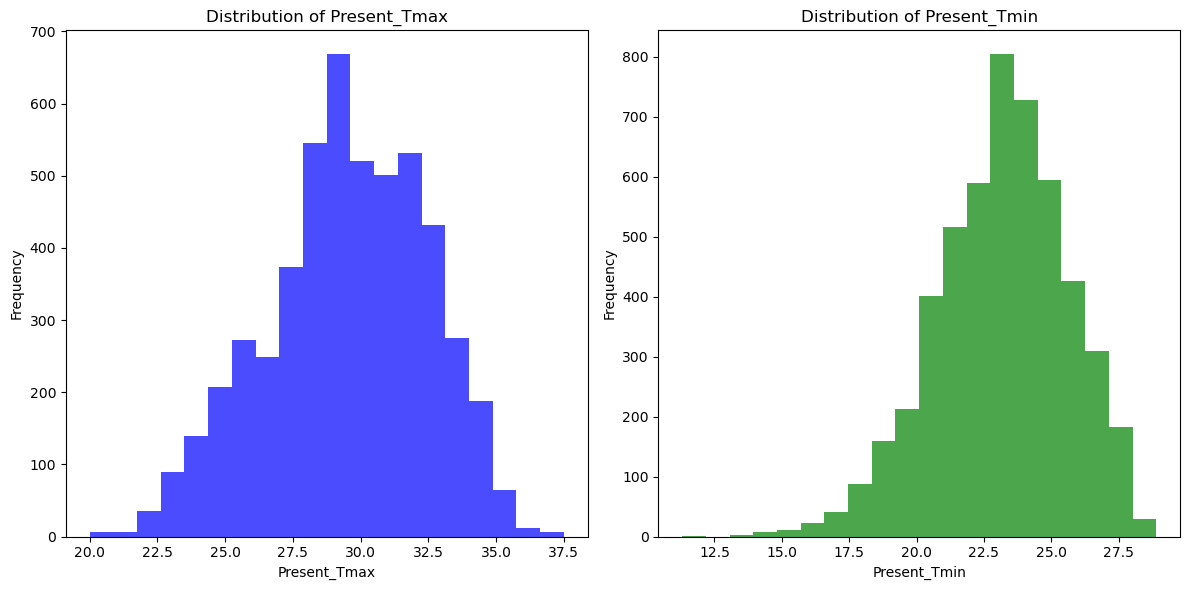

In [78]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Present_Tmax'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Present_Tmax')
plt.ylabel('Frequency')
plt.title('Distribution of Present_Tmax')

plt.subplot(1, 2, 2)
plt.hist(df['Present_Tmin'], bins=20, color='green', alpha=0.7)
plt.xlabel('Present_Tmin')
plt.ylabel('Frequency')
plt.title('Distribution of Present_Tmin')

plt.tight_layout()
plt.show()


#### 3. Are there any unusual or extreme values (outliers) in temperature, and if so, do they have any specific patterns or reasons?



C:\Users\marah salahat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\marah salahat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


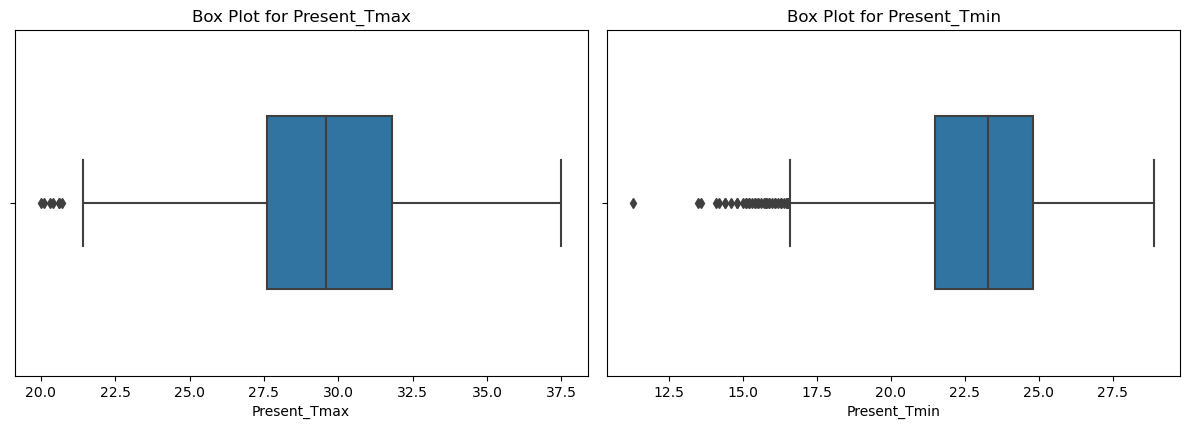

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of important columns
temp = ['Present_Tmax', 'Present_Tmin']

# Create a box plot for each important column
plt.figure(figsize=(12, 8))
for i, column in enumerate(temp, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], orient='vertical', width=0.5)
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()


